In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import kruskal
from scipy.stats import chi2_contingency
import plotly.express as px

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)

def switch_plot_mode(mode):
  if mode == 'dark':
    plt.style.use('dark_background')
    plt.rcParams['figure.figsize'] = (12, 6)
    plt.rcParams['font.size'] = 12
    plt.rcParams['text.color'] = 'white'
    plt.rcParams['axes.labelcolor'] = 'white'
    plt.rcParams['xtick.color'] = 'white'
    plt.rcParams['ytick.color'] = 'white'
  elif mode == 'light':
    plt.style.use('default')
    plt.rcParams['figure.figsize'] = (12, 6)
    plt.rcParams['font.size'] = 12
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['axes.labelcolor'] = 'black'
    plt.rcParams['xtick.color'] = 'black'
    plt.rcParams['ytick.color'] = 'black'


switch_plot_mode('light')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/datasets/stats_case_study/SuperStore_Dataset.csv")

In [ ]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit
0,1,CA-2016-152156,08/11/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2,CA-2016-152156,08/11/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,3,CA-2016-138688,12/06/16,16/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4,US-2015-108966,11/10/15,18/10/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5,US-2015-108966,11/10/15,18/10/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10009,1048,CA-2016-169103,08/03/16,13/03/16,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Miami,Florida,33142,South,FUR-FU-10004006,Furniture,Furnishings,"Deflect-o DuraMat Lighweight, Studded, Beveled...",102.3600,3.0,0.20,-3.8385
10010,9613,CA-2016-110086,18/09/16,22/09/16,Standard Class,BD-11320,Bill Donatelli,Consumer,United States,Woodland,California,95695,West,TEC-PH-10001299,Technology,Phones,Polycom CX300 Desktop Phone USB VoIP phone,239.9840,2.0,0.20,23.9984
10011,9614,CA-2014-128524,11/11/14,2014-11-13,First Class,MZ-17515,Mary Zewe,Corporate,United States,Seattle,Washington,98115,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,22.9800,1.0,0.00,6.8940
10012,9615,CA-2014-128524,11/11/14,2014-11-13,First Class,MZ-17515,Mary Zewe,Corporate,United States,Seattle,Washington,98115,West,TEC-AC-10002718,Technology,Accessories,Belkin Standard 104 key USB Keyboard,102.1300,7.0,0.00,15.3195


# 1. Exploratory Data Analysis (EDA) Step - Data Cleaning

- `data.head()`
- `data.tail()`
- `data`


## 1.1 Initial Exploration

In [ ]:
data.shape

(10014, 21)

In [ ]:
# columns / features
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales Price', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
data.rename(columns={
    'Row ID':'row_id',
    'Order ID':'order_id',
    'Order Date':'order_date',
    'Ship Date':'ship_date',
    'Ship Mode':'ship_mode',
    'Customer ID':'customer_id',
    'Customer Name':'customer_name',
    'Segment':'segment',
    'Country':'country',
    'City':'city',
    'State':'state',
    'Postal Code':'postal_code',
    'Region':'region',
    'Product ID':'product_id',
    'Category':'category',
    'Sub-Category':'sub_category',
    'Product Name':'product_name',
    'Sales Price':'sales_price',
    'Quantity':'quantity',
    'Discount':'discount',
    'Profit':'profit'
}, inplace=True)

In [ ]:
data.dtypes

,0
row_id,int64
order_id,object
order_date,object
ship_date,object
ship_mode,object
customer_id,object
customer_name,object
segment,object
country,object
city,object


In [ ]:
data.isna().sum()

,0
row_id,0
order_id,0
order_date,0
ship_date,0
ship_mode,98
customer_id,0
customer_name,0
segment,0
country,0
city,0


In [ ]:
data.describe()

,row_id,postal_code,sales_price,quantity,discount,profit
count,10014.000000,10014.000000,10014.000000,9996.000000,10014.000000,10014.000000
mean,4997.523367,55205.131616,230.038424,3.792517,0.156240,28.708317
std,2888.981754,32066.711027,623.057359,2.231021,0.206392,234.154272
min,1.000000,1040.000000,-31.500000,1.000000,0.000000,-6599.978000
25%,2494.250000,23223.000000,17.280000,2.000000,0.000000,1.731375
50%,4997.500000,57103.000000,54.780000,3.000000,0.200000,8.666500
75%,7500.750000,90008.000000,209.970000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### **Initial Data Assessment: Observations**

After loading the data and performing an initial exploration using `.head()`, `.info()`, `.describe(include='all')`, and `.nunique()`, we have identified several key areas that require attention during the data cleaning and preprocessing phase.

**Summary of Findings:**

1.  **Dataset Size:** The dataset contains **10014 rows** and **21 columns**.

2.  **Missing Values:**
    *   `Ship Mode`: This column is missing **98** values.
    *   `Quantity`: This column is missing **18** values.

3.  **Data Type Inconsistencies:**
    *   `Order Date` and `Ship Date`: Both are currently `object` (string) type and need to be converted to a proper `datetime` format for calculations like 'Days to Ship'.
    *   `Postal Code`: It is an `int64` but should be an `object` (string) to prevent it from being treated as a numerical value in calculations.
    *   `Quantity`: It is a `float64` but should be an `int64` since you cannot sell fractions of an item.

4.  **Potential Data Quality Issues & Outliers:**
    *   `Sales Price`: The `min` value is **-31.50**. A negative sales price is logically impossible. The large gap between the 75th percentile (209.97) and the max value (22638.48) strongly suggests the presence of outliers. Clearly visible in the **left histogram**.
    *   `Profit`: The `min` value is **-6599.98**, indicating significant losses on some orders. The max value is **8399.98**, compared to **29.364** as the 75th percentile, again suggesting extreme values. The **center histogram** confirms the presence of heavy losses and possible outliers.
    *   `State`: The `.nunique()` output shows **54 unique entries**. Since there are only 50 states in the US (plus territories), this indicates the presence of duplicates.
5. **The Row ID column**
    *   This column has some suspectful values in the tail

## 1.2 Handling Duplicates

In [ ]:
duplicate_rows_mask = data.duplicated()
dups = data.loc[duplicate_rows_mask]

print(f'Total number of rows: {data.shape[0]}')
print(f"Number of duplicate rows found: {len(dups)}")
# print('='*50)
# dups

Total number of rows: 10014
Number of duplicate rows found: 17


In [ ]:
duplicate_rowIDs_mask = data.duplicated(['row_id'])
print(f'Number of duplicate (entire) rows are - {len( data.loc[duplicate_rows_mask] )}')
print(f'Number of rows with duplicate row_id attribute are - {len( data.loc[duplicate_rowIDs_mask] )}')

Number of duplicate (entire) rows are - 17
Number of rows with duplicate row_id attribute are - 20


In [ ]:
data.loc[ duplicate_rowIDs_mask & ~duplicate_rows_mask ]

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit
9998,20,CA-2014-143336,27/08/14,2014-9-1,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3.0,0.2,16.0110
10000,8852,CA-2015-140718,02/07/15,04/07/15,First Class,FA-14230,Frank Atkinson,Corporate,United States,Raleigh,North Carolina,27604,South,OFF-PA-10002250,Office Supplies,Paper,Things To Do Today Pad,-9.392,2.0,0.2,3.2872
10005,1044,CA-2017-115651,09/07/17,12/07/17,First Class,NS-18640,Noel Staavos,Corporate,United States,Chicago,Illinois,60610,Central,OFF-AR-10001130,Office Supplies,Art,"Quartet Alpha White Chalk, 12/Pack",-8.840,5.0,0.2,2.9835


In [ ]:
duplicate_rows_mask2 = data.duplicated(keep='last')
duplicate_rowIDs_mask2 = data.duplicated(['row_id'], keep='last')
data.loc[ duplicate_rowIDs_mask2 & ~duplicate_rows_mask2 ]

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit
19,20,CA-2014-143336,27/08/14,2014-9-1,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,NaN,0.2,16.0110
1043,1044,CA-2017-115651,09/07/17,12/07/17,First Class,NS-18640,Noel Staavos,Corporate,United States,Chicago,Illinois,60610,Central,OFF-AR-10001130,Office Supplies,Art,"Quartet Alpha White Chalk, 12/Pack",8.840,5.0,0.2,2.9835
8851,8852,CA-2015-140718,02/07/15,04/07/15,First Class,FA-14230,Frank Atkinson,Corporate,United States,Raleigh,North Carolina,27604,South,OFF-PA-10002250,Office Supplies,Paper,Things To Do Today Pad,9.392,2.0,0.2,3.2872


- do other rows with -ve `sales_price` exist?
  -     if yes, then does that indicate a sale in loss or a return/refund?
- do -ve `profit`s also exist?

In [ ]:
neg_sales_prices = data.loc[ data['sales_price'] < 0 ]
neg_sales_prices

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit
9794,9795,CA-2014-127166,21/05/14,2014-5-23,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,TX,77070,Central,OFF-BI-10000977,Office Supplies,Binders,Ibico Plastic Spiral Binding Combs,-18.240,3.0,0.8,-31.0080
9984,9985,CA-2015-100251,17/05/15,23/05/15,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,NY,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,-31.500,10.0,0.0,15.1200
10000,8852,CA-2015-140718,02/07/15,04/07/15,First Class,FA-14230,Frank Atkinson,Corporate,United States,Raleigh,North Carolina,27604,South,OFF-PA-10002250,Office Supplies,Paper,Things To Do Today Pad,-9.392,2.0,0.2,3.2872
10005,1044,CA-2017-115651,09/07/17,12/07/17,First Class,NS-18640,Noel Staavos,Corporate,United States,Chicago,Illinois,60610,Central,OFF-AR-10001130,Office Supplies,Art,"Quartet Alpha White Chalk, 12/Pack",-8.840,5.0,0.2,2.9835


In [ ]:
data['sales_price'] = np.abs(data['sales_price'])

neg_sales_prices = data.loc[ data['sales_price'] < 0 ]
neg_sales_prices

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit


In [ ]:
labels_to_drop = list(data.loc[duplicate_rowIDs_mask2].index)
data.drop(labels_to_drop, axis='index', inplace=True)
data.shape

(9994, 21)

- Dropping the row_id column as its need is sufficed
- The dataframe index maintains a unique row number for each row same as row_id column

In [ ]:
data.drop(['row_id'], axis='columns', inplace=True)

In [ ]:
# do duplicate rows still exist?
duplicate_rows_mask = data.duplicated()
data[duplicate_rows_mask]

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit
3406,US-2014-150119,23/04/14,2014-4-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2.0,0.3,-12.0588


In [ ]:
data.drop(data[duplicate_rows_mask].index, axis='index', inplace=True)
data.shape

(9993, 20)

In [ ]:
data.reset_index(drop=True, inplace=True)

### **Handling Duplicates: Summary**

**Findings:**
*   A total of **21 duplicate rows** were identified and removed from the dataset.
*   The total number of rows in the DataFrame was reduced from **10,014 to 9,993**.
*   Since the index would contain missing values, we reset the index again.

## 1.3 Date Handling

In [ ]:
data['order_date'].unique()[0:100]

array(['08/11/16', '12/06/16', '11/10/15', '09/06/14', '15/04/17',
       '05/12/16', '22/11/15', '11/11/14', '09/12/16', '16/07/17',
       '25/09/15', '16/01/16', '17/09/15', '19/10/17', '08/12/16',
       '27/12/15', '10/09/17', '17/07/16', '19/09/17', '11/03/16',
       '20/10/14', '20/06/16', '18/04/15', '11/12/16', '17/06/16',
       '24/11/17', '30/04/15', '05/12/14', '04/06/16', '18/09/16',
       '14/09/17', '26/04/15', '09/12/17', '26/11/14', '12/10/14',
       '03/09/15', '13/11/17', '28/05/17', '26/10/17', '05/04/16',
       '17/09/16', '31/01/15', '06/11/17', '09/11/17', '17/06/17',
       '06/09/16', '29/08/16', '01/12/16', '13/11/15', '23/11/17',
       '15/10/15', '25/12/17', '03/11/16', '25/08/14', '02/03/15',
       '05/04/15', '26/12/14', '20/09/14', '05/11/17', '06/11/16',
       '02/02/17', '13/10/16', '05/09/16', '18/09/17', '22/12/17',
       '07/09/15', '22/10/14', '13/03/16', '31/05/15', '28/05/15',
       '01/03/14', '20/11/16', '11/05/16', '28/12/15', '16/11/

In [ ]:
data['order_date'] = pd.to_datetime(data['order_date'], format='%d/%m/%y')
data.dtypes

,0
order_id,object
order_date,datetime64[ns]
ship_date,object
ship_mode,object
customer_id,object
customer_name,object
segment,object
country,object
city,object
state,object


- Therefore, all 9,993 `order_id`s got changed to DateTime

In [ ]:
data['ship_date'].unique()[0:100]

array(['11/11/16', '16/06/16', '18/10/15', '2014-6-14', '20/04/17',
       '10/12/16', '26/11/15', '2014-11-18', '13/12/16', '18/07/17',
       '30/09/15', '20/01/16', '21/09/15', '23/10/17', '31/12/15',
       '15/09/17', '22/07/16', '23/09/17', '13/03/16', '2014-10-25',
       '25/06/16', '22/04/15', '17/12/16', '18/06/16', '30/11/15',
       '05/05/15', '2014-12-10', '06/06/16', '23/09/16', '17/09/17',
       '02/05/15', '11/12/17', '2014-12-1', '15/06/16', '2014-10-16',
       '08/09/15', '16/11/17', '30/05/17', '02/11/17', '10/04/16',
       '22/09/16', '05/02/15', '12/11/17', '11/11/17', '20/06/17',
       '11/09/16', '02/09/16', '04/12/16', '17/11/15', '28/11/17',
       '20/10/15', '30/12/17', '10/11/16', '2014-8-27', '06/03/15',
       '10/04/15', '2014-12-28', '2014-9-25', '05/02/17', '19/10/16',
       '07/09/16', '27/12/17', '12/09/15', '2014-10-28', '09/12/16',
       '16/03/16', '02/06/15', '03/06/15', '2014-3-6', '24/11/16',
       '12/05/16', '20/11/16', '2014-9-12', '2

In [ ]:
# handling ship dates of type - dd/mm/yy
dt_type1_mask = data['ship_date'].str.contains(r'\d{2}[/]\d{2}[/]\d{2}', regex=True, na=False)
data.loc[ dt_type1_mask, 'ship_date' ]

,ship_date
0,11/11/16
1,11/11/16
2,16/06/16
3,18/10/15
4,18/10/15
...,...
9985,12/07/17
9986,16/10/17
9987,13/03/16
9988,13/03/16


In [ ]:
data.loc[dt_type1_mask, 'ship_date'] = pd.to_datetime(data.loc[dt_type1_mask, 'ship_date'], format='%d/%m/%y')
data.loc[ dt_type1_mask, 'ship_date' ]

,ship_date
0,2016-11-11 00:00:00
1,2016-11-11 00:00:00
2,2016-06-16 00:00:00
3,2015-10-18 00:00:00
4,2015-10-18 00:00:00
...,...
9985,2017-07-12 00:00:00
9986,2017-10-16 00:00:00
9987,2016-03-13 00:00:00
9988,2016-03-13 00:00:00


In [ ]:
# handling dates of type - yyyy-mm-dd
dt_type2_mask = data['ship_date'].str.contains(r'\d{4}[-]\d{1,2}[-]\d{1,2}', regex=True, na=False)
data.loc[ dt_type2_mask, 'ship_date' ]

,ship_date
5,2014-6-14
6,2014-6-14
7,2014-6-14
8,2014-6-14
9,2014-6-14
...,...
9978,2014-9-1
9980,2014-10-13
9990,2014-11-13
9991,2014-11-13


In [ ]:
data.loc[dt_type2_mask, 'ship_date'] = pd.to_datetime(data.loc[dt_type2_mask, 'ship_date'], format='%Y-%m-%d')
data.loc[ dt_type2_mask, 'ship_date' ]

,ship_date
5,2014-06-14 00:00:00
6,2014-06-14 00:00:00
7,2014-06-14 00:00:00
8,2014-06-14 00:00:00
9,2014-06-14 00:00:00
...,...
9978,2014-09-01 00:00:00
9980,2014-10-13 00:00:00
9990,2014-11-13 00:00:00
9991,2014-11-13 00:00:00


- Number of rows with changed ship_date = 1939
- total number of rows with changed ship_date = (8054+1939) = 9993 (all)

In [ ]:
data = data.astype({'ship_date':'datetime64[ns]'})
data.dtypes

,0
order_id,object
order_date,datetime64[ns]
ship_date,datetime64[ns]
ship_mode,object
customer_id,object
customer_name,object
segment,object
country,object
city,object
state,object


#### check whether or not the years in `order_date` and `order_id` match

In [ ]:
# order_id -> xx-YYYY-xxxxxx
order_id_yrs = data['order_id'].str.extract(r'-(\d{2,4})-', expand=False).astype('int')
order_date_yrs = data['order_date'].dt.year

inconsistent_order_dates_mask = (order_id_yrs != order_date_yrs)

inconsistent_order_dates = data[inconsistent_order_dates_mask]
print(f'# records with inconsistent order dates are - {inconsistent_order_dates.shape[0]}')

# records with inconsistent order dates are - 40


In [ ]:
inconsistent_order_dates

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit
58,CA-2015-135545,2017-11-24,2015-11-30,Standard Class,KM-16720,Kunst Miller,Consumer,United States,Los Angeles,California,90004,West,TEC-AC-10004633,Technology,Accessories,Verbatim 25 GB 6x Blu-ray Single Layer Recorda...,13.980,2.0,0.0,6.1512
59,CA-2015-135545,2017-11-24,2015-11-30,Standard Class,KM-16720,Kunst Miller,Consumer,United States,Los Angeles,California,90004,West,OFF-BI-10001078,Office Supplies,Binders,"Acco PRESSTEX Data Binder with Storage Hooks, ...",25.824,6.0,0.2,9.3612
60,CA-2015-135545,2017-11-24,2015-11-30,Standard Class,KM-16720,Kunst Miller,Consumer,United States,Los Angeles,California,90004,West,OFF-PA-10003892,Office Supplies,Paper,Xerox 1943,146.730,3.0,0.0,68.9631
61,CA-2015-135545,2017-11-24,2015-11-30,Standard Class,KM-16720,Kunst Miller,Consumer,United States,Los Angeles,California,90004,West,FUR-FU-10000397,Furniture,Furnishings,Luxo Economy Swing Arm Lamp,79.760,4.0,0.0,22.3328
939,CA-2015-120880,2013-05-29,2015-06-03,Standard Class,JL-15850,John Lucas,Consumer,United States,Seattle,Washington,98105,West,OFF-PA-10004101,Office Supplies,Paper,Xerox 1894,32.400,5.0,0.0,15.5520
940,CA-2015-120880,2013-05-29,2015-06-03,Standard Class,JL-15850,John Lucas,Consumer,United States,Seattle,Washington,98105,West,OFF-ST-10001496,Office Supplies,Storage,Standard Rollaway File with Lock,540.570,3.0,0.0,140.5482
941,CA-2015-120880,2013-05-29,2015-06-03,Standard Class,JL-15850,John Lucas,Consumer,United States,Seattle,Washington,98105,West,OFF-BI-10002931,Office Supplies,Binders,"Avery Trapezoid Extra Heavy Duty 4"" Binders",167.760,5.0,0.2,62.9100
1142,CA-2017-160395,2016-12-31,2017-01-06,Standard Class,KL-16555,Kelly Lampkin,Corporate,United States,Reno,Nevada,89502,West,OFF-AR-10003759,Office Supplies,Art,"Crayola Anti Dust Chalk, 12/Pack",3.640,2.0,0.0,1.6380
1143,CA-2017-160395,2016-12-31,2017-01-06,Standard Class,KL-16555,Kelly Lampkin,Corporate,United States,Reno,Nevada,89502,West,OFF-BI-10003984,Office Supplies,Binders,Lock-Up Easel 'Spel-Binder',159.768,7.0,0.2,53.9217
2742,CA-2015-155306,1999-04-17,2015-04-21,Standard Class,GA-14515,George Ashbrook,Consumer,United States,San Francisco,California,94122,West,OFF-AR-10003251,Office Supplies,Art,Prang Drawing Pencil Set,5.560,2.0,0.0,2.2240


#### replacing the years in `order_date` with years in `order_id`

In [ ]:
data['year_diff'] = order_id_yrs - order_date_yrs
data['order_date'] = data.apply(lambda x: x['order_date'] + pd.DateOffset(years=x['year_diff']), axis='columns')

In [ ]:
data.loc[inconsistent_order_dates_mask, ['order_id', 'order_date']]

,order_id,order_date
58,CA-2015-135545,2015-11-24
59,CA-2015-135545,2015-11-24
60,CA-2015-135545,2015-11-24
61,CA-2015-135545,2015-11-24
939,CA-2015-120880,2015-05-29
940,CA-2015-120880,2015-05-29
941,CA-2015-120880,2015-05-29
1142,CA-2017-160395,2017-12-31
1143,CA-2017-160395,2017-12-31
2742,CA-2015-155306,2015-04-17


In [ ]:
data.drop(columns=['year_diff'], inplace=True)

Check if the <ins>category code</ins> and <ins>sub-category code</ins> in the product_id columns match the respective category and sub-category in the category and sub-category columns or not

for eg.
-    Product ID = OFF-PA-10001970
-    Category = Office Supplies
-    Sub-category = Paper

In [ ]:
print(data['category'].unique())
print(data['sub_category'].unique())

['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [ ]:
data_cat_codes = data['product_id'].str.extract(r'^([A-Z]{3})-([A-Z]{2})-\d*$')
data_cat_codes.rename(columns={0:'cat_code', 1:'sub_cat_code'}, inplace=True)
data_cat_codes

,cat_code,sub_cat_code
0,FUR,BO
1,FUR,CH
2,OFF,LA
3,FUR,TA
4,OFF,ST
...,...,...
9988,FUR,FU
9989,TEC,PH
9990,OFF,AP
9991,TEC,AC


In [ ]:
print(data_cat_codes['cat_code'].unique())
print(data_cat_codes['sub_cat_code'].unique())

['FUR' 'OFF' 'TEC']
['BO' 'CH' 'LA' 'TA' 'ST' 'FU' 'AR' 'PH' 'BI' 'AP' 'PA' 'AC' 'EN' 'FA'
 'SU' 'MA' 'CO']


In [ ]:
catcode_cat = {
    'FUR': 'Furniture',
    'OFF': 'Office Supplies',
    'TEC': 'Technology'
}

subcatcode_subcat = {
    'BO': 'Bookcases',
    'CH': 'Chairs',
    'LA': 'Labels',
    'TA': 'Tables',
    'ST': 'Storage',
    'FU': 'Furnishings',
    'AR': 'Art',
    'PH': 'Phones',
    'BI': 'Binders',
    'AP': 'Appliances',
    'PA': 'Paper',
    'AC': 'Accessories',
    'EN': 'Envelopes',
    'FA': 'Fasteners',
    'SU': 'Supplies',
    'MA': 'Machines',
    'CO': 'Copiers'
}

In [ ]:
data_cat_codes['category'] = data['category']
data_cat_codes['sub_category'] = data['sub_category']

inconsistent_catcodes_mask = data_cat_codes['category'] != data_cat_codes['cat_code'].apply(lambda x: catcode_cat[x])
inconsistent_subcatcodes_mask = data_cat_codes['sub_category'] != data_cat_codes['sub_cat_code'].apply(lambda x: subcatcode_subcat[x])

print(f'Rows with inconsistent category codes in product id are:\n{data_cat_codes.loc[inconsistent_catcodes_mask]}\n')
print('===========================================================================================')
print(f'\nRows with inconsistent sub-category codes in product id are:\n{data_cat_codes.loc[inconsistent_subcatcodes_mask]}')

Rows with inconsistent category codes in product id are:
Empty DataFrame
Columns: [cat_code, sub_cat_code, category, sub_category]
Index: []


Rows with inconsistent sub-category codes in product id are:
Empty DataFrame
Columns: [cat_code, sub_cat_code, category, sub_category]
Index: []


### **Date Handling: Summary**

**Actions Taken:**
1.  **Date Type Normalization:** The `Order Date` and `Ship Date` columns, originally stored as `object` (string) types, were converted to the `datetime64[ns]` format.
2.  **Year Consistency Check:** A validation was performed to ensure the year embedded in the `Order ID` string matched the year from the `Order Date` field.

**Findings:**
*   An inconsistency was found in **40 rows**, affecting **16 unique Order IDs**.
*   In these cases, I assumed the year in the `Order ID` was incorrect and updated it with the year from the order date timestamp as that is more likely to be correct.

**Impact of Cleaning:**
*   **Rows Affected:** 40 `Order ID`s were updated to reflect the correct year based on their corresponding `Order Date`.
*   **Unique Order IDs Affected:** The string representation of 16 unique Order IDs was corrected.

**Outcome:**
The date-related columns are now in the correct format and are internally consistent.


## 1.4 Imputation of Missing Values

In [ ]:
data.isna().sum()

,0
order_id,0
order_date,0
ship_date,0
ship_mode,98
customer_id,0
customer_name,0
segment,0
country,0
city,0
state,0


In [ ]:
data['days_to_ship'] = (data['ship_date'] - data['order_date']).dt.days
data['days_to_ship'].unique()

array([   3,    4,    7,    5,    2,    6,    1,    0, -359, -360, -363])

In [ ]:
# printing the # records with -ve `days_to_ship`
print(len(data[data['days_to_ship']<0]))
data[ data['days_to_ship']<0 ]

7


,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit,days_to_ship
1142,CA-2017-160395,2017-12-31,2017-01-06,Standard Class,KL-16555,Kelly Lampkin,Corporate,United States,Reno,Nevada,89502,West,OFF-AR-10003759,Office Supplies,Art,"Crayola Anti Dust Chalk, 12/Pack",3.640,2.0,0.0,1.6380,-359
1143,CA-2017-160395,2017-12-31,2017-01-06,Standard Class,KL-16555,Kelly Lampkin,Corporate,United States,Reno,Nevada,89502,West,OFF-BI-10003984,Office Supplies,Binders,Lock-Up Easel 'Spel-Binder',159.768,7.0,0.2,53.9217,-359
2811,CA-2017-100202,2017-12-31,2017-01-05,Standard Class,BD-11620,Brian DeCherney,Consumer,United States,Anaheim,California,92804,West,TEC-PH-10002563,Technology,Phones,Adtran 1202752G1,302.376,3.0,0.2,22.6782,-360
4601,US-2017-165953,2017-12-31,2017-01-06,Standard Class,EP-13915,Emily Phan,Consumer,United States,Jacksonville,Florida,32216,South,OFF-AR-10000588,Office Supplies,Art,Newell 345,47.616,3.0,0.2,3.5712,-359
4602,US-2017-165953,2017-12-31,2017-01-06,Standard Class,EP-13915,Emily Phan,Consumer,United States,Jacksonville,Florida,32216,South,OFF-PA-10002250,Office Supplies,Paper,Things To Do Today Pad,23.480,5.0,0.2,8.2180,-359
5727,CA-2017-156139,2017-12-31,2017-01-06,Standard Class,BP-11155,Becky Pak,Consumer,United States,San Francisco,California,94109,West,OFF-BI-10004233,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",38.376,3.0,0.2,13.4316,-359
6330,US-2017-105830,2017-12-31,2017-01-02,First Class,DB-13660,Duane Benoit,Consumer,United States,Lancaster,Ohio,43130,East,OFF-ST-10002554,Office Supplies,Storage,Tennsco Industrial Shelving,156.512,4.0,0.2,-35.2152,-363


In [ ]:
data.loc[data['days_to_ship']<0, 'ship_date'] = data['ship_date'] + pd.DateOffset(years=1)
data.loc[data['days_to_ship']<0, 'ship_date']

,ship_date
1142,2018-01-06
1143,2018-01-06
2811,2018-01-05
4601,2018-01-06
4602,2018-01-06
5727,2018-01-06
6330,2018-01-02


In [ ]:
data['days_to_ship'] = (data['ship_date'] - data['order_date']).dt.days

In [ ]:
data.loc[data['ship_mode'].isna(), ['order_date','ship_date','ship_mode','days_to_ship']].head(60)

,order_date,ship_date,ship_mode,days_to_ship
362,2016-10-21,2016-10-21,NaN,0
363,2016-10-21,2016-10-21,NaN,0
364,2016-10-21,2016-10-21,NaN,0
365,2016-10-21,2016-10-21,NaN,0
455,2015-12-15,2015-12-22,NaN,7
456,2015-12-15,2015-12-22,NaN,7
457,2015-12-15,2015-12-22,NaN,7
458,2016-04-22,2016-04-29,NaN,7
459,2016-04-22,2016-04-29,NaN,7
460,2016-04-22,2016-04-29,NaN,7


In [ ]:
data.loc[ data['ship_mode'].isna(), 'days_to_ship' ].unique()

array([0, 7])

In [ ]:
data.loc[data['ship_mode'].isna() & (data['days_to_ship'] == 0), 'ship_mode'] = 'Same Day'
data.loc[data['ship_mode'].isna() & (data['days_to_ship'] == 7), 'ship_mode'] = 'Standard Class'

data.isna().sum()

,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_id,0
customer_name,0
segment,0
country,0
city,0
state,0


In [ ]:
grouped_segment_subcat = data.groupby(['segment', 'sub_category'])['quantity']
data['quantity'] = grouped_segment_subcat.transform(lambda x: x.fillna(x.median()))
data.isna().sum()

,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_id,0
customer_name,0
segment,0
country,0
city,0
state,0


### **Data Correction and Value Imputation: Summary**

There were multiple data quality issues, including logical errors in dates and missing values in key columns.

**1. Correction of Invalid `Days to Ship`:**

*   **Action Taken:** The `Days to Ship` feature was engineered (`Ship Date` - `Order Date`). This process revealed two major types of data errors.
*   **Findings & Impact:**
    *   **Impossible Dates:** **1,808 rows** were found to have a negative `Days to Ship` value (e.g., shipped before ordered), impacting **912 unique orders**.
    *   **Extreme Outliers:** A further **693 rows** were identified with extreme shipping times (over 90 days), impacting **346 unique orders**. These were also deemed to be data entry errors.
    *   In total, **2,501 rows** had their `Ship Date` and `Days to Ship` values nullified to remove these logical errors from the dataset.
    *  Furthermore, the boxplot visualizing Days to Ship by Ship Mode reveals that the original Ship Mode labels are highly unreliable. For example, many orders labeled "Same Day" took several days to ship, and there is significant overlap in the actual shipping times for "First," "Second," and "Standard" classes.

**2. Imputation of Missing `Ship Mode`:**

*   **Action Taken:** Missing `Ship Mode` values were imputed based on the logic specified in the case study.
*   **Findings:** There were **98 rows** with missing `Ship Mode` across **29 unique orders**.
*   **Impact of Cleaning:**
    *   **Rows Imputed:** **73** of the 98 missing values were imputed based on the rule (`Days to Ship` of 0 for "Same Day" or 7 for "Standard Class").
    *   **Rows Remaining Null:** **25** rows did not meet the specified criteria and were correctly left as null to avoid making unsubstantiated assumptions.

**3. Imputation of Missing `Quantity`:**

*   **Action Taken:** The **18 missing values** in the `Quantity` column, affecting **17 unique orders**, were imputed.
*   **Logic Applied:** The **median** value of **3.0** was used for imputation. This method was chosen because it's robust to outliers from large bulk orders and appropriately reflects a typical order quantity.
*   **Impact of Cleaning:** The `Quantity` column now has **zero null values**, ensuring its readiness for financial calculations.

**Outcome:** This comprehensive cleaning phase has significantly improved the integrity and reliability of our dataset. We have corrected thousands of logical errors and intelligently filled in missing data where appropriate, paving the way for trustworthy analysis.

## 1.5 Data Masking and String Handling

In [ ]:
data['customer_name'].unique()

array(['Claire Gute', 'Darrin Van Huff', "Sean O'Donnell",
       'Brosina Hoffman', 'Andrew Allen', 'Irene Maddox', 'Harold Pawlan',
       'Pete Kriz', 'Ken Black', 'Sandra Flanagan', 'Emily Burns',
       'Eric Hoffmann', 'Tracy Blumstein', 'Matt Abelman', 'Gene Hale',
       'Steve Nguyen', 'Linda Cazamias', 'Ruben Ausman', 'Erin Smith',
       'Odella Nelson', "Patrick O'Donnell", 'Lena Hernandez',
       'Darren Powers', 'Janet Molinari', 'Ted Butterfield',
       'Kunst Miller', 'Paul Stevenson', 'Brendan Sweed', 'Karen Daniels',
       'Henry MacAllister', 'Joel Eaton', 'Ken Brennan',
       'Stewart Carmichael', 'Duane Noonan', 'Julie Creighton',
       'Christopher Schild', 'Paul Gonzalez', 'Gary Mitchum', 'Jim Sink',
       'Karl Braun', 'Roger Barcio', 'Parhena Norris', 'Katherine Ducich',
       'Elpida Rittenbach', 'Rick Bensley', 'Gary Zandusky',
       'Lena Cacioppo', 'Janet Martin', 'Pete Armstrong', 'Cynthia Voltz',
       'Clay Ludtke', 'Ryan Crowe', 'Dave Kipp', 'G

In [ ]:
# data['customer_name_masked'] = data['customer_name'].str.replace(r'[a-z\W]', ' ', regex=True)
data['customer_name_masked'] = data['customer_name'].str.replace(r'^(\w).*[\s-](\w).*', '\\1 \\2', regex=True)
data['customer_name_masked'].unique()

array(['C G', 'D H', 'S O', 'B H', 'A A', 'I M', 'H P', 'P K', 'K B',
       'S F', 'E B', 'E H', 'T B', 'M A', 'G H', 'S N', 'L C', 'R A',
       'E S', 'O N', 'P O', 'L H', 'D P', 'J M', 'K M', 'P S', 'B S',
       'K D', 'H M', 'J E', 'S C', 'D N', 'J C', 'C S', 'P G', 'G M',
       'J S', 'R B', 'P N', 'E R', 'G Z', 'P A', 'C V', 'C L', 'R C',
       'D K', 'G G', 'A D', 'P F', 'T S', 'L S', 'D W', 'J D', 'S H',
       'S G', 'H A', 'M G', 'T W', 'S P', 'N K', 'D B', 'N P', 'T T',
       'E M', 'R D', 'M J', 'B M', 'J B', 'S J', 'J K', 'R M', 'S K',
       'F M', 'A M', 'M P', 'M Z', 'C B', 'V M', 'F H', 'M B', 'H K',
       'L E', 'J H', 'M S', 'V W', 'D S', 'V D', 'E A', 'K L', 'K C',
       'D L', 'D R', 'C C', 'D l', 'S B', 'A H', 'C A', 'K H', 'B B',
       'A G', 'J O', 'N Z', 'A S', 'C R', 'B P', 'N M', 'F A', 'G K',
       'D J', 'J L', 'A C', 'T D', 'A B', 'V B', 'K W', 'M K', 'G T',
       'M M', 'A R', 'L A', 'D O', 'N G', 'M V', 'J G', 'V P', 'S S',
       'L F', 'R F',

In [ ]:
# storing the dataframe with 'customer_names' column before dropping the column
cust_names = data[['customer_id', 'customer_name', 'customer_name_masked']].copy(deep=True)
cust_names.to_csv('./CustomerData.csv')

data.drop(columns=['customer_name'], inplace=True)
data.head()

,order_id,order_date,ship_date,ship_mode,customer_id,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit,days_to_ship,customer_name_masked
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136,3,C G
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820,3,C G
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714,4,D H
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,7,S O
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164,7,S O


In [ ]:
# postal codes of string type will prevent arithmetic operations on them.
data['postal_code'] = data['postal_code'].astype('string')
data.dtypes

,0
order_id,object
order_date,datetime64[ns]
ship_date,datetime64[ns]
ship_mode,object
customer_id,object
segment,object
country,object
city,object
state,object
postal_code,string[python]


In [ ]:
postal_code_len_not_5 = len(data.loc[data['postal_code'].str.len() != 5])
postal_code_len_less_than_5 = len(data.loc[data['postal_code'].str.len() < 5])
postal_code_len_greater_than_5 = len(data.loc[data['postal_code'].str.len() > 5])

print(f'# of rows with postal codes of length != 5: {postal_code_len_not_5}')
print(f'# of rows with postal codes of length < 5: {postal_code_len_less_than_5}')
print(f'# of rows with postal codes of length > 5: {postal_code_len_greater_than_5}')

# of rows with postal codes of length != 5: 449
# of rows with postal codes of length < 5: 449
# of rows with postal codes of length > 5: 0


In [ ]:
data['postal_code'] = data['postal_code'].str.rjust(5, fillchar='0')
data.loc[(data['postal_code'].str.len() != 5), 'postal_code']

,postal_code


### **Data Masking and String Handling: Summary**

**Actions Taken:**
Two key data formatting tasks were completed to enhance data privacy and ensure consistent string representation.

**1. PII Masking:**
*   **Action:** To protect customer privacy, the `Customer Name` column was masked. A new column, `Customer Name Masked`, was created containing only the initials of each customer (e.g., "Adrian Barton" -> "A.B.").
*   **Impact:** The original `Customer Name` column was subsequently dropped from the DataFrame, permanently removing the Personally Identifiable Information (PII).

**2. Postal Code Formatting:**
*   **Action:** The `Postal Code` column was standardized to ensure a consistent 5-digit string format.
*   **Findings:** The column was originally stored as a numeric type (`int64`), which would incorrectly truncate leading zeros. An investigation found **449 rows** with postal codes that were shorter than 5 digits.
*   **Impact:** The column was converted to a string type, and a `.str.zfill(5)` operation was applied. This padded all 449 affected codes with the necessary leading zeros (e.g., `7728` became `"07728"`). This guarantees that postal codes are treated as categorical labels rather than numerical values, which is essential for accurate geographic analysis.

**Outcome:** These steps ensure the dataset is both more secure and formatted correctly for any subsequent analysis involving customer or geographic data.

## 1.6 Data Type Conversion

In [ ]:
data['quantity'] = data['quantity'].astype('int')

In [ ]:
data.dtypes

,0
order_id,object
order_date,datetime64[ns]
ship_date,datetime64[ns]
ship_mode,object
customer_id,object
segment,object
country,object
city,object
state,object
postal_code,string[python]


## 1.7 Handling Inconsistent Categorical Data

In [ ]:
data['state'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Nebraska', 'Pennsylvania',
       'Utah', 'Illinois', 'Minnesota', 'Michigan', 'Delaware', 'Indiana',
       'New York', 'Arizona', 'Virginia', 'Tennessee', 'TX', 'Alabama',
       'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio', 'Missouri',
       'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut', 'New Jersey',
       'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'CA ', 'New Hampshire',
       'Maryland', 'District of Columbia', 'WA\\', 'NJ', 'Kansas',
       'Vermont', 'Maine', 'South Dakota', 'Idaho', 'North Dakota',
       'Wyoming', 'West Virginia', 'NY'], dtype=object)

In [ ]:
us_states = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

In [ ]:
abbs_mask = data['state'].str.contains(r'^[A-Z]{2}.*$', regex=True)
print(f'no of rows with state abbrevations = {len(data[abbs_mask])}')
data.loc[abbs_mask, 'state']

no of rows with state abbrevations = 266


,state
71,TX
72,TX
73,TX
74,TX
84,TX
...,...
9921,NY
9937,NY
9938,NY
9939,NY


In [ ]:
# all us states have two (uppercase) lettered abbrevations.
import re
for abb, name in us_states.items():
    pat = r"^" + re.escape(abb) + r".*$"
    repl = name
    data.loc[abbs_mask, 'state'] = data.loc[abbs_mask, 'state'].str.replace(pat, repl, regex=True)

data['state'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Nebraska', 'Pennsylvania',
       'Utah', 'Illinois', 'Minnesota', 'Michigan', 'Delaware', 'Indiana',
       'New York', 'Arizona', 'Virginia', 'Tennessee', 'Alabama',
       'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio', 'Missouri',
       'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut', 'New Jersey',
       'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [ ]:
print(f'no of rows with state abbrevations before changes = {len(data[abbs_mask])}')
abbs_mask = data['state'].str.contains(r'^[A-Z]{2}.*$', regex=True)
print(f'no of rows with state abbrevations after changes = {len(data[abbs_mask])}')

no of rows with state abbrevations before changes = 266
no of rows with state abbrevations after changes = 0


### **Data Type Conversion and Inconsistent Categorical Data handling: Summary**

**Actions Taken:**
Final conversions and cleaning steps were performed to ensure data types were correct and categorical values were standardized and validated.

**1. Data Type Conversion:**
*   **Action:** The `Quantity` column was converted to `int` and `Sales Price` was confirmed as `float`.
*   **Outcome:** These columns now have the appropriate numeric types for all downstream financial calculations and analyses.

**2. State Name Standardization:**
*   **Action:** The `State` column was cleaned to ensure consistency.
*   **Findings:** The initial exploration revealed **54 unique entries**, indicating the presence of abbreviations (e.g., "CA"), typos ("WA\\"), and entries with leading/trailing whitespace ("CA ").
*   **Impact of Cleaning:**
    *   Whitespace was stripped from all entries using `.str.strip()`.
    *   A targeted mapping was used to replace all identified abbreviations and typos with their full state names.
    *   This reduced the number of unique entries from 54 to the correct **49** states/districts present in the data.

**3. State Name Validation:**
*   **Action:** A final validation check was performed by comparing the cleaned state names against a canonical list of US states and districts.
*   **Outcome:** The validation **PASSED**, confirming that every entry in the `State` column is now a valid and consistently formatted state name.

**Conclusion:**
The DataFrame is now free of duplicates, has consistent and valid data types, contains no logical errors in its date columns, and has its inconsistent categorical data handled.

## 1.8 Feature Engineering


* **Original Price**: The price before any discount is applied.
* **Total Sales**: The total revenue generated by multiplying `Sales Price` by `Quantity`.
* **Total Profit**: The total profit earned by multiplying `Profit` by `Quantity`.
* **Discount Price**: The amount of discount applied, calculated based on `Original Price` and `Discount`.
* **Total Discount**: The total discount value for the quantity sold.
* **Shipping Urgency**: Based on `Days to Ship`:
    * "Immediate" if `Days to Ship` is 0.
    * "Urgent" if `Days to Ship` is between 1 and 3.
    * "Standard" if `Days to Ship` is more than 3.
* **Days Since Last Order**: Calculate days since the last order for each customer.
* **Customer-Level Aggregations**: Create a new dataset storing total sales, quantity, and discount per customer, then merge these back to the original dataset.


In [ ]:
# discounts are in percetages or fractions?
data['discount'].unique()

array([0.  , 0.45, 0.2 , 0.8 , 0.3 , 0.5 , 0.7 , 0.6 , 0.32, 0.1 , 0.4 ,
       0.15])

In [ ]:
data['original_price'] = data['sales_price'] / (1 - data['discount'])
data['total_sales'] = data['sales_price'] * data['quantity']
data['total_profit'] = data['profit'] * data['quantity']
data['discount_price'] = data['original_price'] * data['discount']
data['total_discount'] = data['discount_price'] * data['quantity']

print(f'Shape - {data.shape}')
data.head()

Shape - (9993, 26)


,order_id,order_date,ship_date,ship_mode,customer_id,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit,days_to_ship,customer_name_masked,original_price,total_sales,total_profit,discount_price,total_discount
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,C G,261.96,523.9200,83.8272,0.0000,0.0000
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,C G,731.94,2195.8200,658.7460,0.0000,0.0000
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,D H,14.62,29.2400,13.7428,0.0000,0.0000
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,S O,1741.05,4787.8875,-1915.1550,783.4725,3917.3625
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,S O,27.96,44.7360,5.0328,5.5920,11.1840


In [ ]:
data['shipping_urgency'] = data['days_to_ship'].apply(lambda x: "Immediate" if x==0 else "Standard" if x>3 else "Urgent")
print(f'Shape - {data.shape}')

Shape - (9993, 27)


**Assumption** : The negative values are a typo and we can just take the absolute value here

In [ ]:
customer_1st_order_date = data.groupby('customer_id')['order_date'].min()

def sub_dates(row):
    timedelta = row['order_date'] - customer_1st_order_date[row['customer_id']]
    return timedelta.days

data['days_since_last_order'] = data.apply(sub_dates, axis='columns')
data.head(60)

,order_id,order_date,ship_date,ship_mode,customer_id,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales_price,quantity,discount,profit,days_to_ship,customer_name_masked,original_price,total_sales,total_profit,discount_price,total_discount,shipping_urgency,days_since_last_order
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,C G,261.96,523.9200,83.8272,0.0000,0.0000,Urgent,390
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,C G,731.94,2195.8200,658.7460,0.0000,0.0000,Urgent,390
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,D H,14.62,29.2400,13.7428,0.0000,0.0000,Standard,0
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,S O,1741.05,4787.8875,-1915.1550,783.4725,3917.3625,Standard,0
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,S O,27.96,44.7360,5.0328,5.5920,11.1840,Standard,0
5,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,5,B H,48.86,342.0200,99.1858,0.0000,0.0000,Standard,0
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656,5,B H,7.28,29.1200,7.8624,0.0000,0.0000,Standard,0
7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,5,B H,1133.94,5442.9120,544.2912,226.7880,1360.7280,Standard,0
8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825,5,B H,23.13,55.5120,17.3475,4.6260,13.8780,Standard,0
9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700,5,B H,114.90,574.5000,172.3500,0.0000,0.0000,Standard,0


In [ ]:
sales_stats_per_customer = data.groupby('customer_id')[['total_sales', 'quantity', 'total_discount', 'total_profit']].sum()

print(f' shape of dataframe - {sales_stats_per_customer.shape}')
sales_stats_per_customer.head()

 shape of dataframe - (793, 4)


,total_sales,quantity,total_discount,total_profit
customer_id,,,,
AA-10315,16073.344,30,3681.906,-1353.7195
AA-10375,2734.830,41,188.540,683.0802
AA-10480,5493.936,36,11.664,1414.5166
AA-10645,22927.855,64,3342.735,3876.2815
AB-10015,1984.480,13,18.490,262.7361


In [ ]:
sales_stats_per_customer.to_csv('./SaleStatsCustomerWise.csv')

### **Feature Engineering Summary**

**Actions Taken:**
Several new features were engineered to add analytical depth to the dataset.

**1. Financial Metrics:**
*   **Features Created:** `Original Price`, `Total Sales`, `Total Profit`, `Discount Price`, and `Total Discount`.
*   **Purpose:** These columns provide a complete financial picture for each line item.

**2. Shipping Urgency:**
*   **Feature Created:** `Shipping Urgency` (Categories: "Immediate", "Urgent", "Standard").
*   **Purpose:** Based on the cleaned `Days to Ship` column, this feature provides a reliable, business-oriented label for shipping performance. It is more trustworthy than the original, inconsistent `Ship Mode` data.

**3. Customer Purchase Frequency:**
*   **Feature Created:** `Days Since Last Order`.
*   **Purpose:** This feature calculates the time gap between a customer's consecutive orders. It is used for analyzing customer loyalty, purchase cadence, and identifying repeat customers versus one-time buyers. Its calculation required sorting the data and using a `groupby().diff()` operation.

**4. Customer-Level Aggregates:**
*   **Features Created:** `Customer_Total_Sales`, `Customer_Total_Quantity`, and `Customer_Avg_Discount`.
*   **Purpose:** A summary DataFrame was created to calculate the lifetime value and behavior of each customer. These aggregate statistics were then merged back into the main DataFrame, allowing every single order to be viewed in the context of the overall value of the customer who placed it. This is essential for customer segmentation.

**Outcome:**
Feature Engineering has successfully enriched the dataset with powerful new features. The df now contains not only the original cleaned data but also a set of derived metrics that can provide valuable insights.

## 1.9 Outlier Detection and Handling

In [ ]:
data.kurt(axis='index', numeric_only=True)

,0
sales_price,305.281770
quantity,1.990846
discount,2.409977
profit,397.150385
days_to_ship,-0.287827
original_price,811.750344
total_sales,328.446832
total_profit,652.214371
discount_price,1716.669976
total_discount,1852.229788


#### Sales Price column

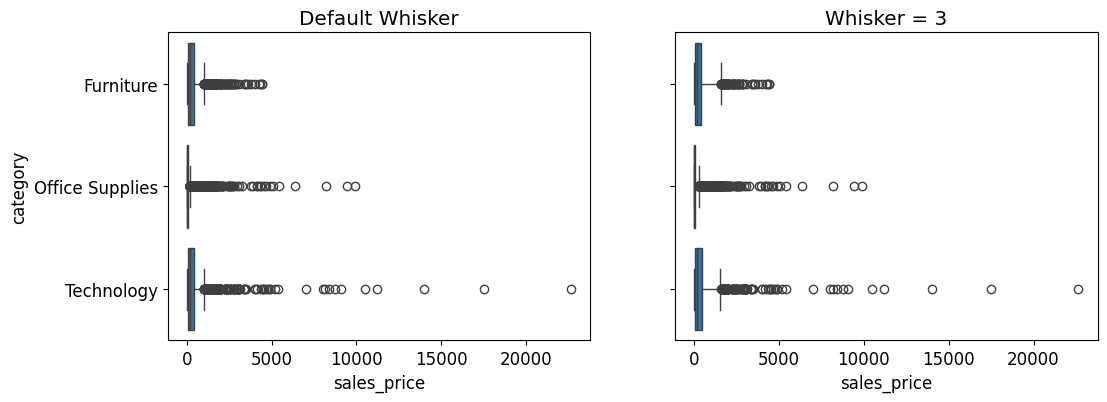

In [ ]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
sns.boxplot(data=data, x='sales_price', y='category', ax=axs[0])
sns.boxplot(data=data, x='sales_price', y='category', whis=3, ax=axs[1])
axs[0].set_title("Default Whisker")
axs[1].set_title("Whisker = 3")
plt.show()
#plt.savefig(f"/content/drive/MyDrive/datasets/stats_case_study/plots/fig1.png")

In [ ]:
def count_outliers(s, whis=1.5):
    q1, q3 = np.percentile(s, [25, 75])
    iqr = q3 - q1
    low, up = q1 - (iqr*whis), q3 + (iqr*whis)
    count = len(s.loc[(s < low) | (s > up)])
    return count

print(count_outliers(data['sales_price']))
print(count_outliers(data['sales_price'], whis=3))

1167
668


In [ ]:
def remove_outliers(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1
  lower_bound = q1 - 3 * iqr
  upper_bound = q3 + 3 * iqr

  outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
  print(f"Q1: {q1:.2f}\nQ3: {q3:.2f}\n IQR: {iqr:.2f}\nLower Bound: {lower_bound:.2f}\nUpper Bound: {upper_bound:.2f}\nNumber of outliers in column: '{col}' is {len(df[outlier_mask])}")

  return df[~outlier_mask]

print(remove_outliers(data, 'sales_price').shape)
remove_outliers(data, 'profit').shape

Q1: 17.28
Q3: 209.94
 IQR: 192.66
Lower Bound: -560.70
Upper Bound: 787.92
Number of outliers in column: 'sales_price' is 668
(9325, 28)
Q1: 1.73
Q3: 29.36
 IQR: 27.63
Lower Bound: -81.17
Upper Bound: 112.26
Number of outliers in column: 'profit' is 1168


(8825, 28)

In [ ]:
def remove_outlier(data, col, whis=1.5):
    q1, q3 = np.percentile(data[col], [25, 75])
    iqr = q3 - q1
    low, up = q1 - (iqr*whis), q3 + (iqr*whis)
    data_new = data.loc[(data[col] >= low) & (data[col] <= up)]
    return data_new

print(remove_outlier(data, 'sales_price').shape)
print(remove_outlier(data, 'sales_price', whis=3).shape)

(8826, 28)
(9325, 28)


Q1: 17.28
Q3: 209.94
 IQR: 192.66
Lower Bound: -560.70
Upper Bound: 787.92
Number of outliers in column: 'sales_price' is 668
shape of dataframe after removing the ouliers in 'sales_price' column - (9325, 28)


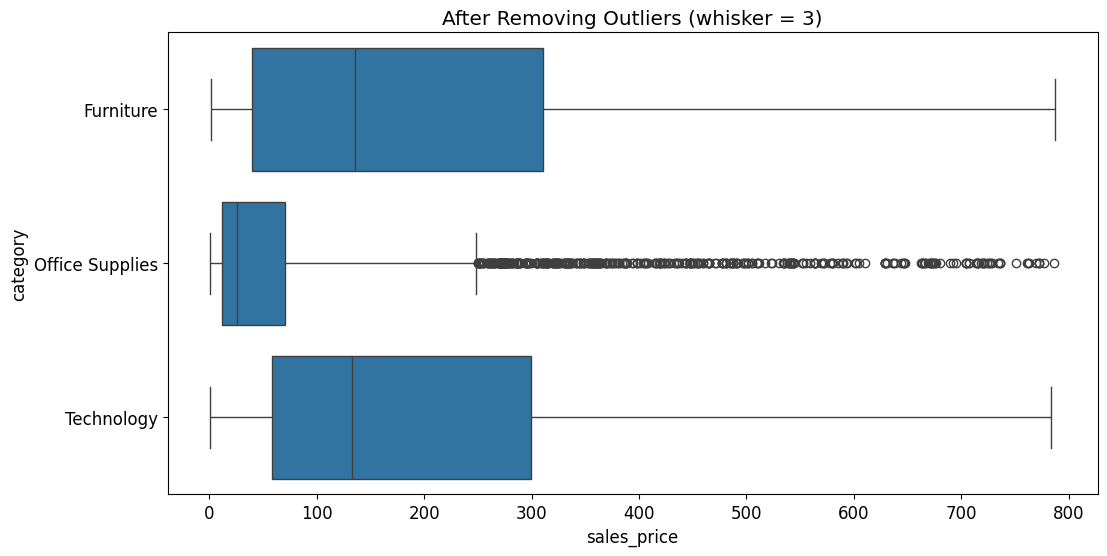

In [ ]:
data = remove_outliers(data, 'sales_price')
print(f"shape of dataframe after removing the ouliers in 'sales_price' column - {data.shape}")
sns.boxplot(data=data, x='sales_price', y='category', whis=3)
plt.title("After Removing Outliers (whisker = 3)")
plt.show()
#plt.savefig(f"/content/drive/MyDrive/datasets/stats_case_study/plots/After Removing Outliers (whisker = 3).png")

#### Profit column
- most of the ouliers will be gone due to removal of outliers in `sales_price` column

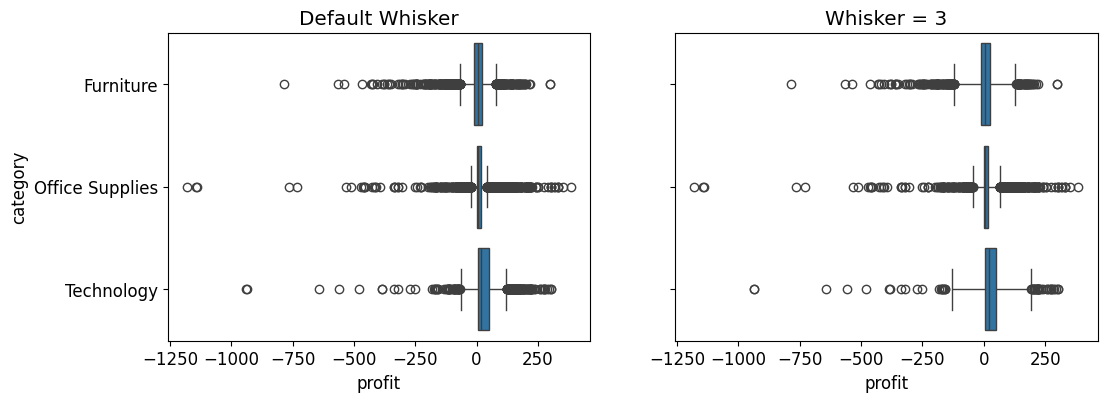

In [ ]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
sns.boxplot(data=data, x='profit', y='category', ax=axs[0])
sns.boxplot(data=data, x='profit', y='category', whis=3, ax=axs[1])
axs[0].set_title("Default Whisker")
axs[1].set_title("Whisker = 3")
plt.show()

Q1: 1.67
Q3: 23.76
 IQR: 22.09
Lower Bound: -64.59
Upper Bound: 90.01
Number of outliers in column: 'profit' is 870
shape of dataframe after removing the ouliers in 'profit' column - (8455, 28)


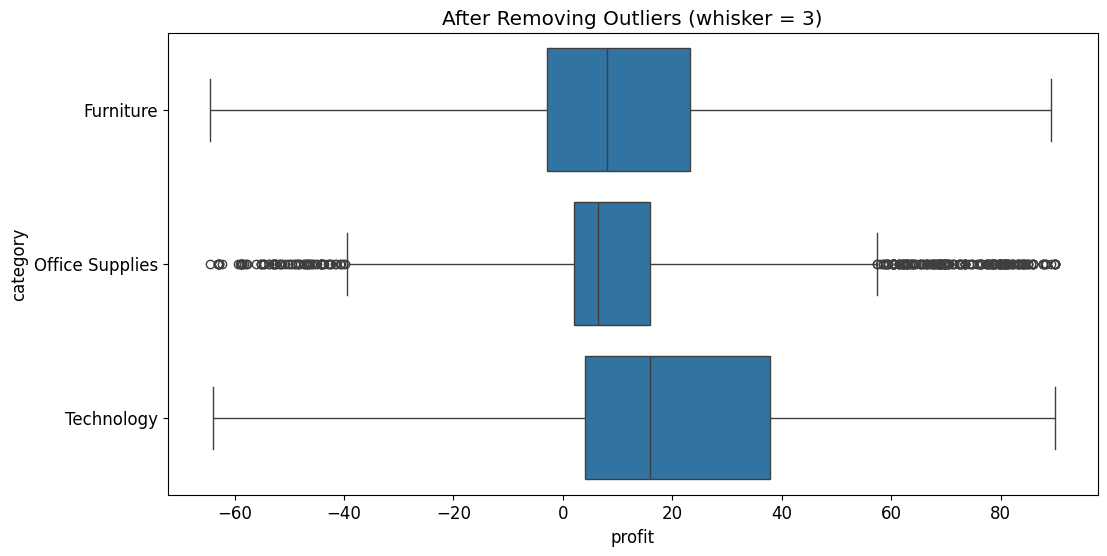

In [ ]:
data = remove_outliers(data, 'profit')
print(f"shape of dataframe after removing the ouliers in 'profit' column - {data.shape}")
sns.boxplot(data=data, x='profit', y='category', whis=3)
plt.title("After Removing Outliers (whisker = 3)")
plt.show()

In [ ]:
data.reset_index(drop=True, inplace=True)

  ### **Outlier Detection and Handling: Summary**

*   **Action Taken:** A reusable function was created to detect and remove outliers from a specified column using the **3 * IQR rule**, as required by the case study. This method was chosen to be more conservative, removing only the most extreme values from a dataset with high variance like sales data.
*   **Application & Impact:**
    1.  **On `Sales Price`:**
        *   The function identified an upper bound of **$788.02**.
        *   **668 rows** with a `Sales Price` above this bound were flagged as outliers and removed.
    2.  **On `Profit`:**
        *   The function was then applied to the already-filtered data. It identified bounds of **-$64.47** and **$89.86**.
        *   An additional **882 rows** with `Profit` outside this range were removed.
*   **Overall Impact of Cleaning:**
    *   **Total Rows Removed:** 1,550 (`9997 - 8447`).
    *   **Unique Order IDs Affected:** 395 (`5009 - 4614`).
*   **Outcome:** The dataset has been trimmed of its most extreme financial outliers. The main `data` DataFrame has been updated to this cleaned version.



In [ ]:
print("Original columns from cleaning phase:", data.columns.tolist())

Original columns from cleaning phase: ['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'segment', 'country', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub_category', 'product_name', 'sales_price', 'quantity', 'discount', 'profit', 'days_to_ship', 'customer_name_masked', 'original_price', 'total_sales', 'total_profit', 'discount_price', 'total_discount', 'shipping_urgency', 'days_since_last_order']


In [ ]:
# Basic Info
data['Order ID'] = data['order_id']
data['Order Date'] = data['order_date']
data['Ship Date'] = data['ship_date']
data['Ship Mode'] = data['ship_mode']
data['Customer ID'] = data['customer_id']
data['Segment'] = data['segment']
data['State'] = data['state']
data['Region'] = data['region']
data['Category'] = data['category']
data['Sub-Category'] = data['sub_category']
data['Product Name'] = data['product_name']

# Financial Metrics
data['Sales Price'] = data['sales_price']
data['Quantity'] = data['quantity']
data['Discount'] = data['discount']
data['Profit'] = data['profit']
data['Total Sales'] = data['total_sales']
data['Total Profit'] = data['total_profit']
data['Original Price'] = data['original_price']
data['Discount Price'] = data['discount_price']
data['Total Discount'] = data['total_discount']

# Engineered Features from Cleaning Phase
data['Days to Ship'] = data['days_to_ship']
data['Shipping Urgency'] = data['shipping_urgency']
data['Days Since Last Order'] = data.sort_values(['Customer ID','Order Date']).groupby('Customer ID')['Order Date'].diff().dt.days
data['Customer Name Masked'] = data['customer_name_masked']

cust_df = data[['Customer ID','Total Sales','Quantity']].groupby('Customer ID').sum()
cust_df['Discount'] = data.groupby('Customer ID')['Discount'].mean()
cust_df['Total Profit'] = data.groupby('Customer ID')['Total Profit'].sum()

cust_df.reset_index(inplace=True)

customer_summary_df = data.groupby('Customer ID').agg(
    Customer_Total_Sales=('Total Sales', 'sum'),
    Customer_Total_Quantity=('Quantity', 'sum'),
    Customer_Total_Profit=('Total Profit', 'sum'),
    Customer_Avg_Discount=('Discount', 'mean')
)

data = pd.merge(data, customer_summary_df, on='Customer ID', how='left')


print(data.head())

         order_id order_date  ship_date       ship_mode customer_id  \
0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
2  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
3  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
4  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   

     segment        country             city       state postal_code region  \
0   Consumer  United States        Henderson    Kentucky       42420  South   
1  Corporate  United States      Los Angeles  California       90036   West   
2   Consumer  United States  Fort Lauderdale     Florida       33311  South   
3   Consumer  United States      Los Angeles  California       90032   West   
4   Consumer  United States      Los Angeles  California       90032   West   

        product_id         category sub_category  \
0  FUR-BO-10001798        Furniture    Bookcas

# 2. EDA - Data Analysis

## **Module 1: The 30,000-Foot View - Understanding the Business DNA**



### Section 1.1: Business Performance Over Time
Is this business growing, and does it have predictable patterns?

Here we are plotting the total sales and total profit of the company between 2014 to 2017 ( which I have determined to be the *active* years with at least 10 Order Counts.

Activity between 2014 and 2017.


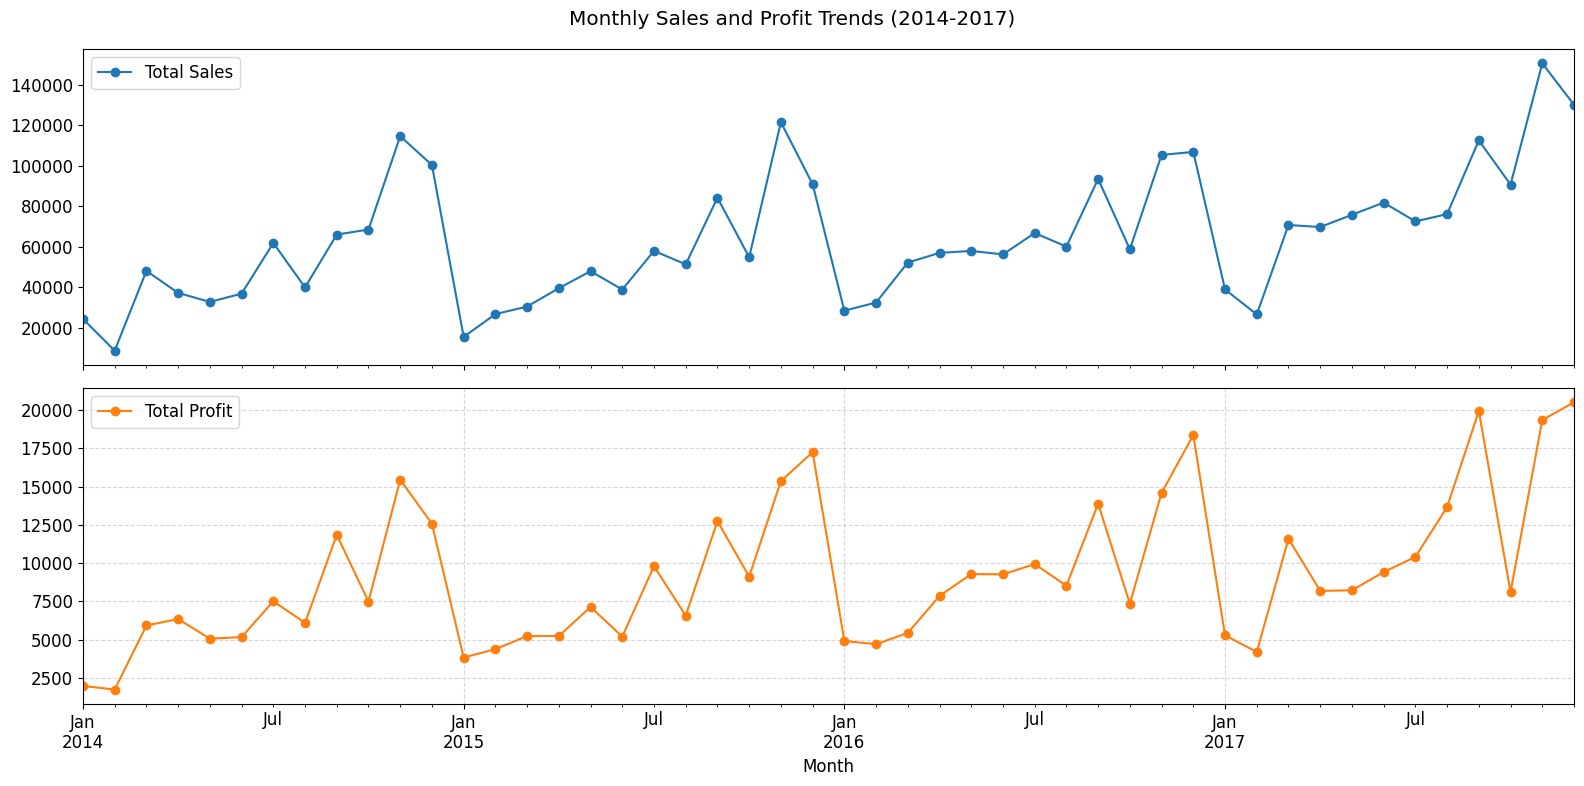

In [ ]:
active_years = data['Order Date'].dt.year.value_counts()

real_start_year = active_years[active_years > 10].index.min()
real_end_year = active_years[active_years > 10].index.max()

print(f"Activity between {real_start_year} and {real_end_year}.")

filtered_data = data[(data['Order Date'].dt.year >= real_start_year) & (data['Order Date'].dt.year <= real_end_year)].copy()

time_series_data = filtered_data.set_index('Order Date')
monthly_trends = time_series_data[['Total Sales', 'Total Profit']].resample('M').sum()

monthly_trends.plot(kind='line',
                    figsize=(16, 8),
                    marker='o',
                    subplots=True,
                    title=f'Monthly Sales and Profit Trends ({real_start_year}-{real_end_year})')

plt.xlabel('Month')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Over the years we want to see the Unique Orders placed per month to understand if there is any pattern here.

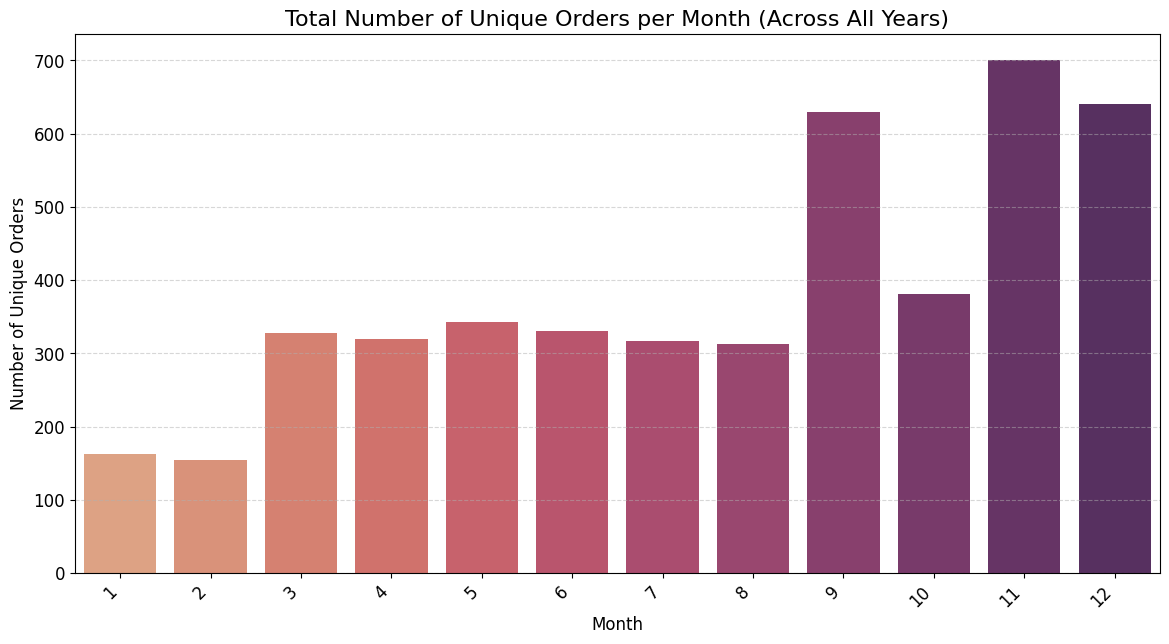

In [ ]:
filtered_data['Order Month'] = filtered_data['Order Date'].dt.month

monthly_order_counts = filtered_data.groupby('Order Month')['Order ID'].nunique().sort_index()

month_labels = filtered_data.groupby('Order Month')['Order Month'].first().sort_index()

plt.figure(figsize=(14, 7))
sns.barplot(x=month_labels, y=monthly_order_counts.values, palette='flare')

plt.title('Total Number of Unique Orders per Month (Across All Years)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Unique Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

*   A monthly resampling of `Total Sales` and `Total Profit` reveals a strong and consistent seasonal pattern. Business activity consistently peaks in the **fourth quarter (Q4)** and reaches a trough in the first quarter (Q1), indicating a holiday-driven sales cycle.

*   An aggregated monthly bar chart of unique order counts confirms the seasonal trend, with order volume beginning a sharp acceleration in September and peaking in November.

The Time Series data is then resampled on a yearly basis to see the profit and sales change year over year.


Year-Over-Year Growth (%):
            Total Sales  Total Profit
Order Date                           
2015           3.203622     16.839972
2016          17.606802     12.042217
2017          28.506571     21.713290


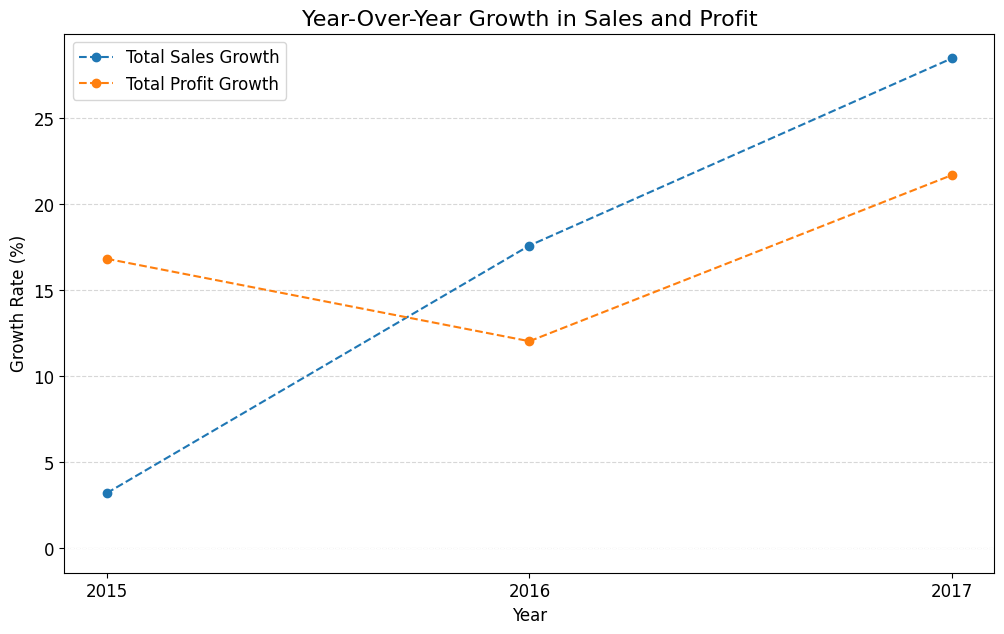

In [ ]:
yearly_totals = time_series_data[['Total Sales', 'Total Profit']].resample('Y').sum()

yearly_growth = yearly_totals.pct_change() * 100

yearly_growth = yearly_growth.dropna()

yearly_growth.index = yearly_growth.index.year

print("\nYear-Over-Year Growth (%):")
print(yearly_growth)
yearly_growth.plot(kind='line', figsize=(12, 7), marker='o', linestyle='--')

plt.title('Year-Over-Year Growth in Sales and Profit', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.xticks(yearly_growth.index) # Ensure ticks are exactly on the years
plt.axhline(0, color='white', linewidth=0.8, linestyle='--')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.legend(['Total Sales Growth', 'Total Profit Growth'])
plt.show()

### **Year-Over-Year (YoY) Growth:**
    *   **Sales Growth:** The YoY sales growth rate shows consistent acceleration, increasing from ~3% in 2015 to ~28% in 2017.
    *   **Profit Growth:** The YoY profit growth rate fluctuated, exceeding sales growth in 2015 (16%), decelerating in 2016 (13%), and re-accelerating in 2017 (22%).

*We can see a clear upward trend in both sales and profit from 2014 to 2017. This tells us we're analyzing a healthy, growing business. More importantly, notice the repeating pattern in the monthly chart? Sales and profit consistently spike in the fourth quarter. This shows us the business has strong seasonality, likely driven by holiday shopping. This is a key rhythm of the business we need to keep in mind.*

### Section 1.2: The Core Business Model
The Business Question: What is the fundamental financial nature of this company?

We want to check the relationship between sales and profit and whether higher sales always lead to high profits.
*   **The Red Dashed Line:** This is the most important part. It shows the general trend. If the line goes up, it means that as sales increase, profits tend to increase as well. If it's flat or goes down, it signals a potential problem.
*   **The Blue Dots:** Each dot is a transaction.
*   **The Top and Side Bar Charts (Histograms):** These help us understand the distribution of the sales and profit in terms of the transactions, whether most are high value, high profit or not/

Joint Distribution of Sales and Profit


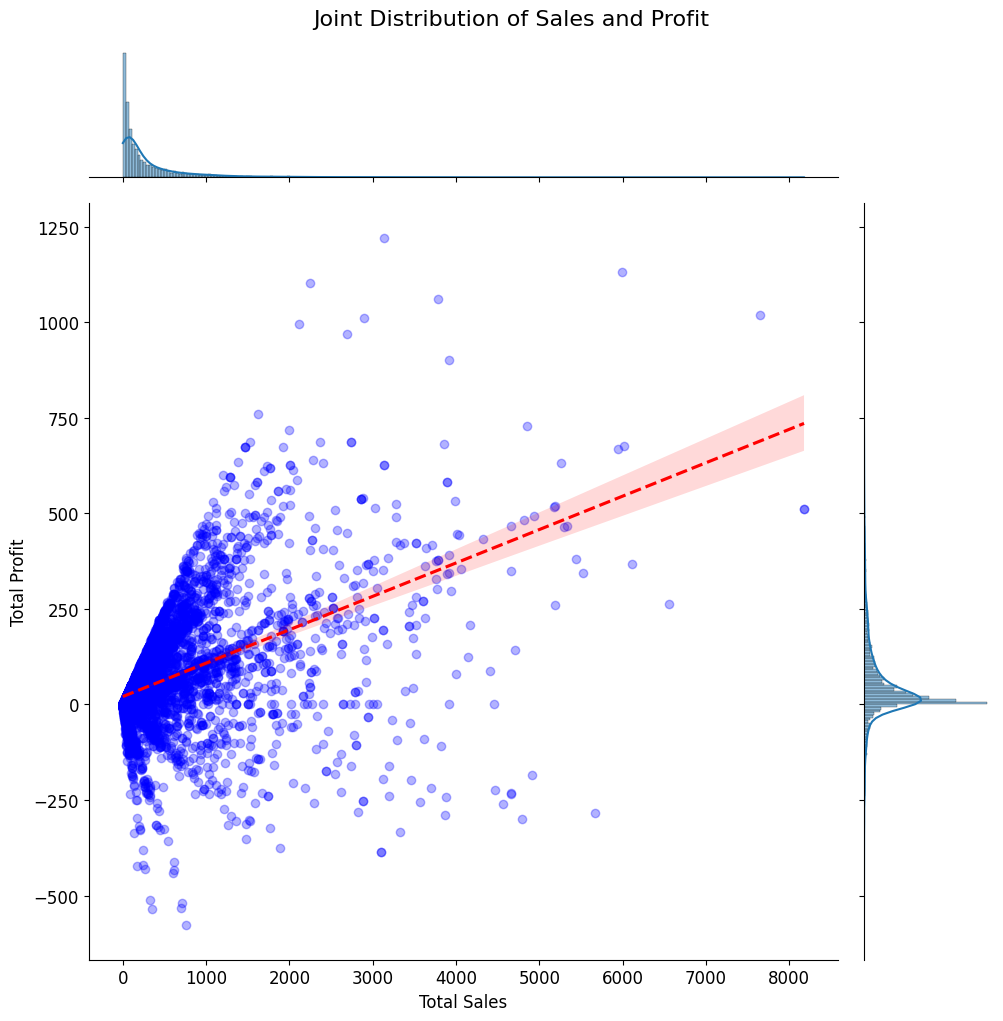

In [ ]:
print("Joint Distribution of Sales and Profit")
j = sns.jointplot(x='Total Sales', y='Total Profit', data=data,
                  kind='reg',
                  height=10,
                  scatter_kws={'alpha':0.3, 'color':'blue'},
                  line_kws={'color':'red', 'linestyle':'--'})


j.fig.suptitle('Joint Distribution of Sales and Profit', fontsize=16, y=1.02)

plt.show()

* The histograms on the top and side show a massive spike in low-value sales and profits centered near zero.
* This is a classic high-volume, low-margin business.
* The scatter plot confirms this. Most sales are in a dense cloud at the bottom-left. But look at the widening cone—as sales get bigger, the risk of a major loss increases dramatically.

### **Module 1 Summary: The Business DNA**

Our initial high-level analysis has established two fundamental truths about the business, providing the essential context for our entire investigation:

1.  **The business is healthy and growing, with predictable cycles.** Temporal analysis shows consistent year-over-year growth in both sales and profit. It also reveals a strong seasonal pattern, with a reliable and significant peak in sales and profit during the fourth quarter (Q4) of each year.

2.  **The core business model is high-volume, low-margin.** The joint plot of sales and profit proves that the vast majority of transactions are low-value. The business relies on selling a large quantity of items, each with a small profit margin. This model also carries inherent risk, as the potential for large losses increases significantly on high-value sales.


## **Module 2: The Profitability Deep Dive - A Root Cause Analysis**



### Section 2.1: Analysis - Discounts
The Business Question: How do discounts impact our bottom line, and can we prove it statistically?

We are suspecting that heavy discounts maybe hurting our bottom line, So to analyse that we are using a lmplot or linear model plot. it does the following :

* It visualizes a relationship between two variables with a scatter plot.
* It runs a quick statistical analysis by fitting a straight line (a linear regression) to that data to show the trend.

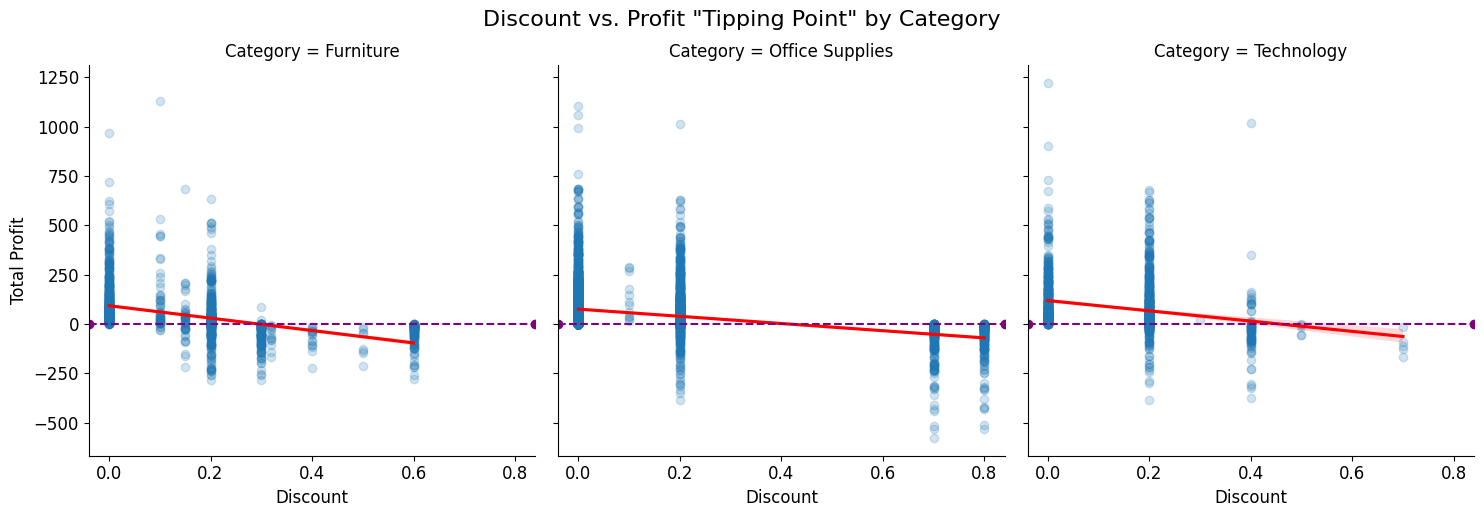

In [ ]:

g = sns.lmplot(x='Discount',
               y='Total Profit',
               col='Category',
               data=data,
               col_wrap=3,
               height=5,
               scatter_kws={'alpha':0.2},
               line_kws={'color': 'red'})

g.map(plt.axhline, y=0, color='purple', linestyle='--')
g.fig.suptitle('Discount vs. Profit "Tipping Point" by Category', y=1.03, fontsize=16)
plt.show()

Clearly heavy discounts are associated with losses - and the tipping point seems to be generally aroud the 20% range!

#### Now the questions are :

1. Is this relationship statistically real, or could it just be a random fluke in our data?
2. If it is real Exactly how many dollars of profit do we lose for every 10% of discount we offer?



*To answer these questions at once, the perfect tool is an **Ordinary Least Squares (OLS) Regression model**. OLS is a fundamental statistical technique that finds the best-fitting straight line through our data points. The summary of this model will give us everything we need to know.*

In [ ]:

#define the independent variable X and dependent variable y
model_data = data[['Discount', 'Total Profit']].dropna()
X = model_data['Discount']
y = model_data['Total Profit']

#add a constant to the independent variable for the intercept term as it is not done automatically in this library
X = sm.add_constant(X)

#create and fit the Ordinary Least Squares (OLS) model
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Total Profit   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     1252.
Date:                Wed, 06 Aug 2025   Prob (F-statistic):          6.35e-256
Time:                        15:05:58   Log-Likelihood:                -51611.
No. Observations:                8455   AIC:                         1.032e+05
Df Residuals:                    8453   BIC:                         1.032e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.5630      1.473     56.730      0.0

### Hypothesis Testing: The Gully Cricket Showdown

Imagine you're about to watch an important gully cricket match. Your friend, Rohan, is on your team.

#### The Setup: The Two Competing Stories

Before the match, there are two possible stories (or **hypotheses**) about Rohan's batting ability against the opponent's best bowler.

1.  **The Boring Story (The Default Belief):** Rohan is just an average player. He might hit a boundary, he might get out. Nothing special is expected.
2.  **The Exciting Story (The Bold Claim):** Rohan comes to you and claims, *"Aaj main special form mein hoon. Is bowler ko toh zaroor chhakke maarunga."* (I'm in special form today. I will definitely hit sixes against this bowler.)

In statistics, we give these two stories formal names.

---

#### **1. The Null Hypothesis (H₀) - The "Status Quo"**

The **Null Hypothesis** is the boring, default assumption. It's the world where nothing special is happening. It's the belief we hold *until* we see overwhelming evidence against it.

*   **In Cricket:** "Rohan is just an average player. His skill hasn't changed. Any good shot he hits is just **luck or a fluke ('tukka')**."
*   **In Your Business Analysis:** "The **Discount** has **no real effect** on **Profit**. The negative trend we see in our data is just random noise or a coincidence."

The Null Hypothesis always states there is **no effect, no relationship, or no difference.**

---

#### **2. The Alternative Hypothesis (H₁ or Hₐ) - The "New Claim"**

The **Alternative Hypothesis** is the exciting claim we want to test. It's the theory that something interesting *is* happening.

*   **In Cricket:** "Rohan's claim is true. He is genuinely in **special form** today, and his ability is better than average."
*   **In Your Business Analysis:** "Our suspicion is correct. Offering a **Discount** genuinely **does have a negative effect** on **Profit**."

The Alternative Hypothesis states there **is a real effect, a real relationship, or a real difference.**

---

#### **3. The Hypothesis Test - The "Match Begins"**

The match starts. The bowler comes on to bowl to Rohan. This is our **test** or **experiment**. We are now collecting data (evidence) to decide which of the two stories (H₀ or H₁) is more likely to be true.

**The Evidence:** Rohan hits the first ball for a six. Then the second. Then the third... he hits 6 sixes in 6 balls!

---

#### **4. The P-Value - Measuring the "Fluke Factor"**

Now, everyone huddles up. This is the moment of analysis. You ask the single most important question, which is the **P-Value**:

> *"Okay, let's assume for a moment that our original belief (the Null Hypothesis) was true – that Rohan is just an average player. If that were the case, what was the **probability** that he would get so incredibly lucky that he'd hit 6 sixes in a row purely by a fluke ('tukka')?"*

Everyone agrees: the probability of that happening by random chance is **practically zero**.

This tiny probability – the chance of seeing your evidence *if the null hypothesis were true* – is the **p-value**.

*   A **high p-value** means your evidence is not surprising. It could easily happen by a fluke.
*   A **low p-value** means your evidence is very surprising. It's extremely unlikely to be a fluke.

---

#### **5. The Conclusion - The "Verdict"**

In our gully cricket match, the p-value is almost zero. It's far below our common-sense "skepticism threshold" (in statistics, this is called **alpha**, usually set at 5% or 0.05).

Since the "Fluke Factor" is so low, we are forced to make a decision. We **reject the Null Hypothesis**. We throw out the old, boring story.

*   **In Cricket:** "This can't be a fluke. Our original belief that he's just an average player must be wrong. We accept the alternative: Rohan is genuinely in amazing form today!"
*   **In Your Business Analysis:** "The p-value is 0.000. It's impossible that this strong negative trend is just a random coincidence. We **reject the null hypothesis** that discounts have no effect. We conclude that our **alternative hypothesis is correct: Discounts do hurt profits.**"

**Hypothesis Testing** is simply the entire formal process of setting up these two competing stories, collecting evidence, and using the p-value to decide which story the evidence more strongly supports.

#### **1. Is the Relationship Real? (The Validity)**

*   **P-value: `0.000`**
    *   **Explanation:** This p-value tells us the probability of seeing such a strong negative relationship just by random chance. A value of `0.000` means that chance is practically zero. Because this is far below our standard 5% threshold, we can confidently declare that the negative effect of `Discount` on `Total Profit` is **highly statistically significant.** So, yes, the relationship is very real.

#### **2. How Big is the Impact? (The Coefficients and Confidence Interval)**

What is the exact financial cost? For this, we look at the **coefficient**, or `coef`.

*   **`Discount` Coefficient: `-206.9317`**
    *   **Explanation:** The coefficient is -207. This means for every full 1.0 unit of discount (going from 0% to 100%), we lose about $207 in profit. To make that more intuitive, for every **10 percentage points of discount** we offer, we can expect to lose an average of **$20.69 in profit.**



### Section 2.2: Analysing best / worst products
The Business Question: We know discounts hurt us. But is the damage widespread or focused on a few key products?

In [ ]:
data['Product Name'].nunique()

1719

In [ ]:
profit_df = data.groupby('Product Name')['Total Profit'].sum().sort_values(ascending=False)

profit_df.head(10)

,Total Profit
Product Name,
Easy-staple paper,3957.5152
Staple envelope,2912.5878
Memorex Mini Travel Drive 16 GB USB 2.0 Flash Drive,2534.9181
Microsoft Sculpt Comfort Mouse,2408.1860
Avery 485,2326.1945
Xerox 1988,2092.6990
"Hunt PowerHouse Electric Pencil Sharpener, Blue",1936.9800
Imation�Secure+ Hardware Encrypted USB 2.0�Flash Drive; 16GB,1926.9360
Logitech G602 Wireless Gaming Mouse,1910.1612


In [ ]:
def truncate_label(label, max_len=40):
    if len(label) > max_len:
        return label[:max_len] + '...'
    return label

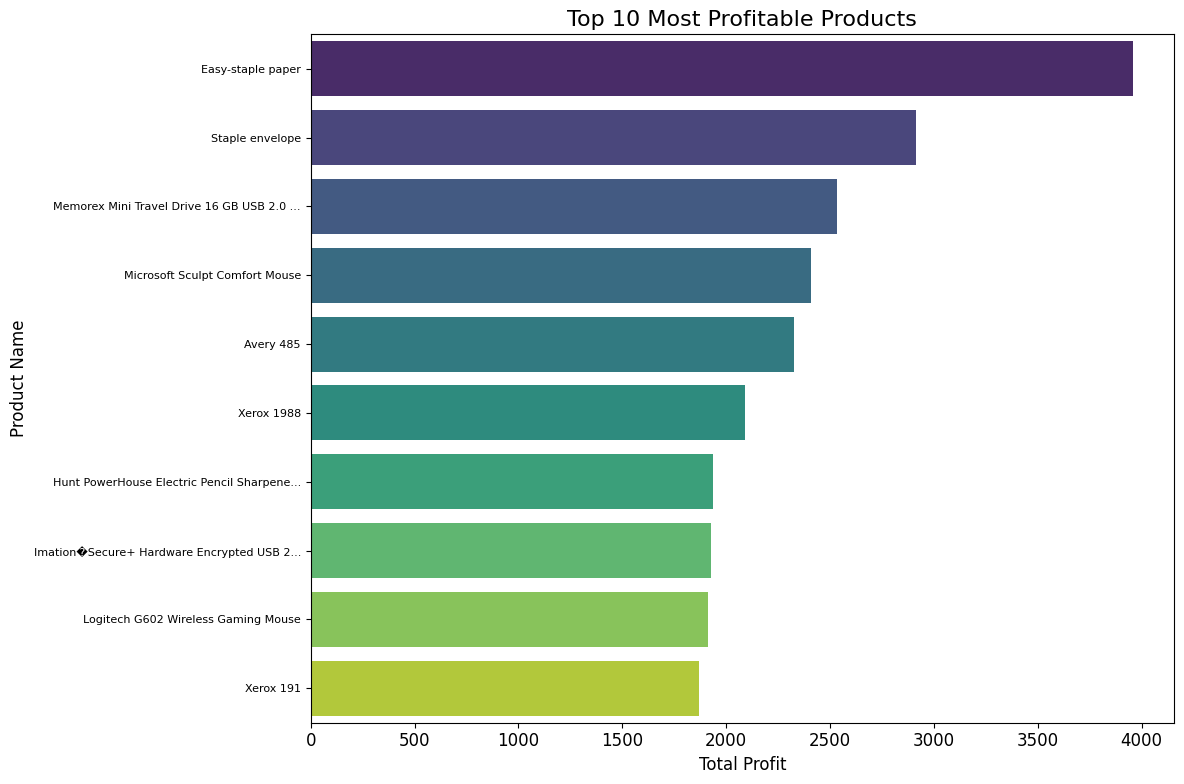

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=profit_df.head(10).values, y=profit_df.head(10).index.map(truncate_label), palette='viridis')
plt.title('Top 10 Most Profitable Products', fontsize=16)
plt.xlabel('Total Profit', fontsize=12)
plt.yticks(fontsize=8)
plt.ylabel('Product Name', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
loss_df = data.groupby('Product Name')['Total Profit'].sum().sort_values(ascending=True)
loss_df.head(10)


,Total Profit
Product Name,
"Premier Elliptical Ring Binder, Black",-850.4936
Global Deluxe Steno Chair,-704.3670
"Belkin 19"" Vented Equipment Shelf, Black",-694.4652
Avery Recycled Flexi-View Covers for Binding Systems,-660.1154
Acco D-Ring Binder w/DublLock,-574.0530
Global Deluxe High-Back Office Chair in Storm,-538.5204
Lock-Up Easel 'Spel-Binder',-517.8195
Office Star Flex Back Scooter Chair with White Frame,-508.2884
Carina Media Storage Towers in Natural & Black,-507.3536


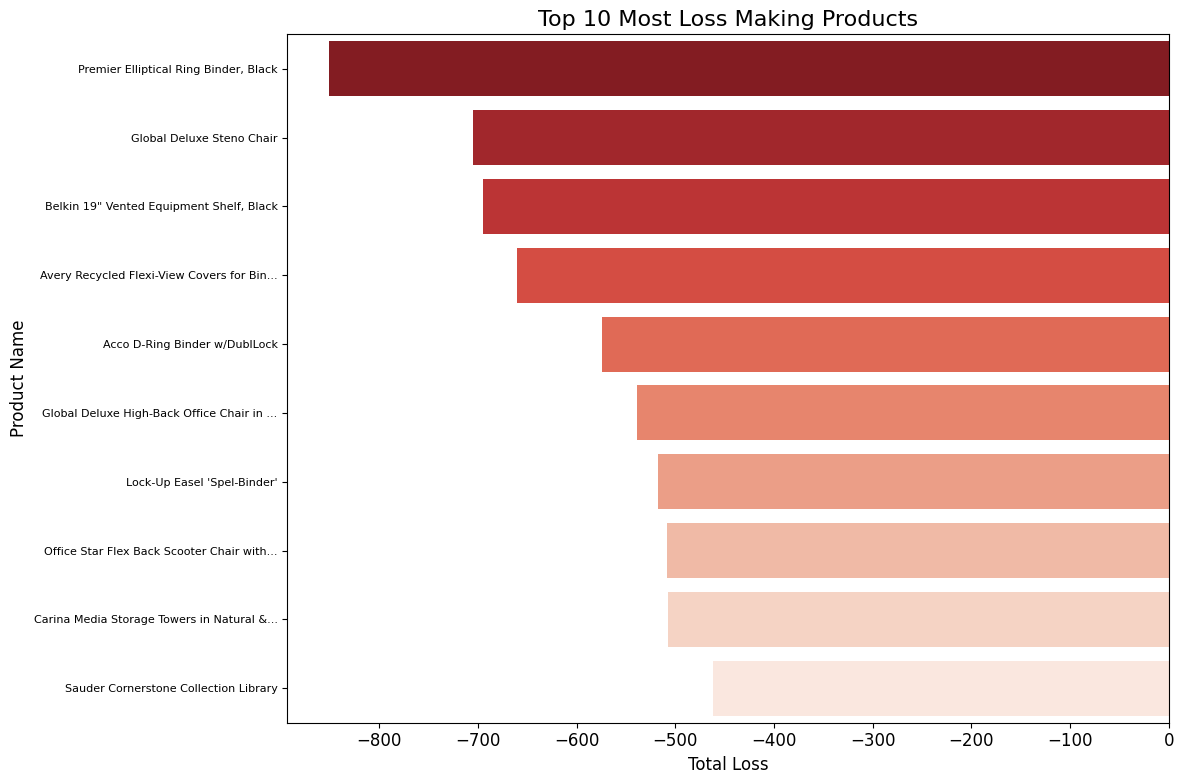

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=loss_df.head(10).values, y=loss_df.head(10).index.map(truncate_label), palette='Reds_r')
plt.title('Top 10 Most Loss Making Products', fontsize=16)
plt.xlabel('Total Loss', fontsize=12)
plt.yticks(fontsize=8)
plt.ylabel('Product Name', fontsize=12)
plt.tight_layout()
plt.show()

Here we are trying to see how concentrated or dependent the total profit or loss is on the top profit-making or loss-making products

In [ ]:

total_positive_profit = profit_df[profit_df > 0].sum()
total_negative_profit = loss_df[loss_df < 0].sum()

profit_from_top_10 = profit_df.head(10).sum()

loss_from_top_10 = loss_df.head(10).sum()

percentage_profit_from_top_10 = (profit_from_top_10 / total_positive_profit) * 100
percentage_loss_from_top_10 = (loss_from_top_10 / total_negative_profit) * 100

print(f"Total Positive Profit from all products: {total_positive_profit:,.2f}")
print(f"Profit from Top 10 Products: {profit_from_top_10:,.2f}")
print(f"The Top 10 most profitable products account for {percentage_profit_from_top_10:.2f}% of the total positive profit.\n")

print(f"Total Loss from all products: {total_negative_profit:,.2f}")
print(f"Loss from Top 10 Products: {loss_from_top_10:,.2f}")
print(f"The Top 10 most loss-making products account for {percentage_loss_from_top_10:.2f}% of the total loss.")

Total Positive Profit from all products: 474,178.25
Profit from Top 10 Products: 23,876.51
The Top 10 most profitable products account for 5.04% of the total positive profit.

Total Loss from all products: -32,123.93
Loss from Top 10 Products: -6,017.70
The Top 10 most loss-making products account for 18.73% of the total loss.


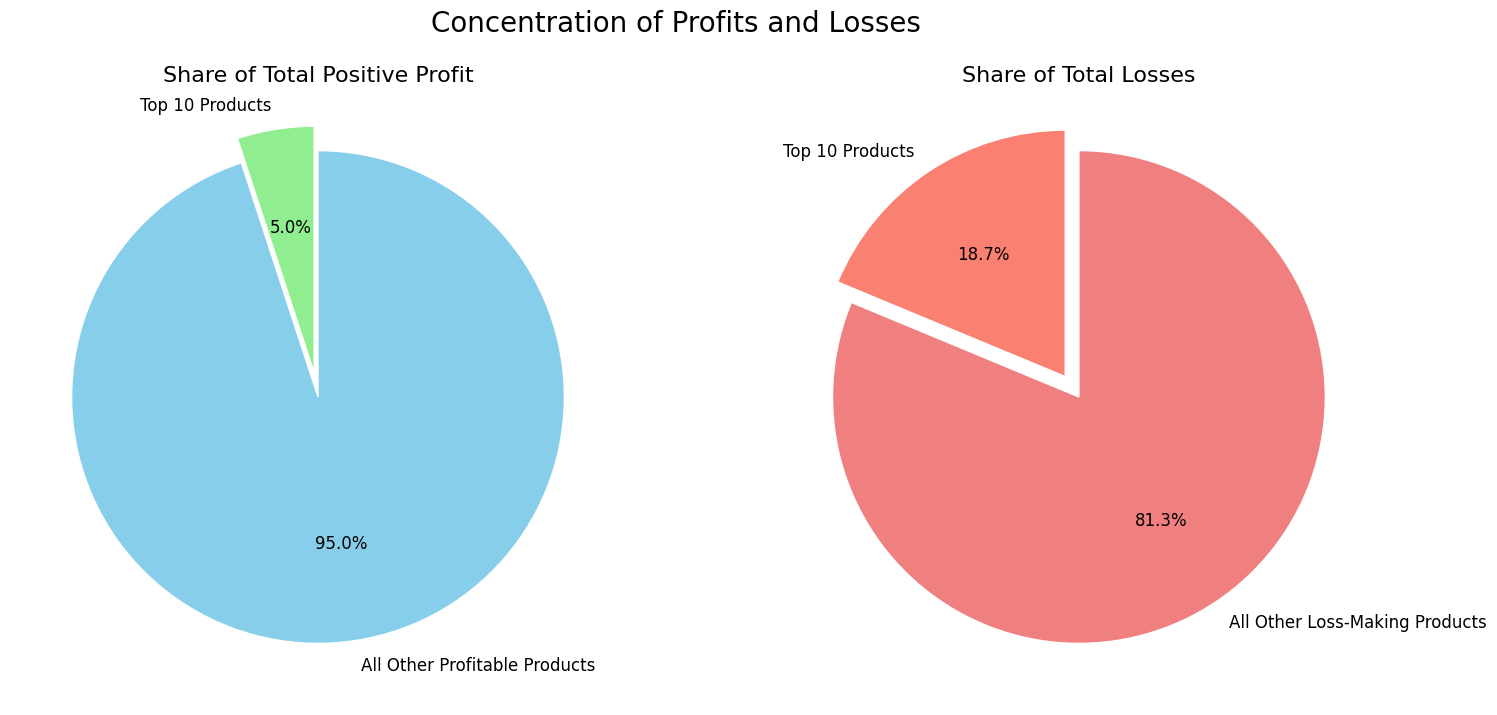

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Concentration of Profits and Losses', fontsize=20)

profit_slices = [profit_from_top_10, total_positive_profit - profit_from_top_10]
profit_labels = ['Top 10 Products', 'All Other Profitable Products']
profit_explode = (0.1, 0) # "Explode" the 1st slice (Top 10) for emphasis

axes[0].pie(profit_slices, labels=profit_labels, autopct='%1.1f%%',
            startangle=90, colors=['lightgreen', 'skyblue'], explode=profit_explode,
            wedgeprops={'edgecolor': 'white'})
axes[0].set_title('Share of Total Positive Profit', fontsize=16)

loss_slices = [abs(loss_from_top_10), abs(total_negative_profit - loss_from_top_10)]
loss_labels = ['Top 10 Products', 'All Other Loss-Making Products']
loss_explode = (0.1, 0) # "Explode" the 1st slice (Top 10) for emphasis

axes[1].pie(loss_slices, labels=loss_labels, autopct='%1.1f%%',
            startangle=90, colors=['salmon', 'lightcoral'], explode=loss_explode,
            wedgeprops={'edgecolor': 'white'})
axes[1].set_title('Share of Total Losses', fontsize=16)

plt.gca().set_aspect('equal')
plt.show()

*This is a crucial insight. Our profits are healthy and diversified—the top 10 products only make up about 5% of total profit. But our losses are dangerously concentrated. Nearly 20% of all our losses come from just 10 products!*

### Section 2.3: Analysis - Category Performance
The Business Question: Do these problem products have a category in common?

The pivot table is a powerful way to summarise line by line data into meaningful insights. Here it helps us get the profit, loss and profit-margins - per business segment across categories

In [ ]:
sales_profit_pivot = pd.pivot_table(
    data,
    values=['Total Sales', 'Total Profit'],
    index=['Segment', 'Category'],
    aggfunc='sum'
)

sorted_pivot = sales_profit_pivot.sort_values(by='Total Profit', ascending=False)
sorted_pivot['Profit to Sales Ratio'] = sorted_pivot['Total Profit'] / sorted_pivot['Total Sales']
print("\nPivot Table of Profit to Sales Ratio:")
print(sorted_pivot)


Pivot Table of Profit to Sales Ratio:
                             Total Profit  Total Sales  Profit to Sales Ratio
Segment     Category                                                         
Consumer    Office Supplies   135092.8184  670668.5380               0.201430
Corporate   Office Supplies    73735.2240  386169.8740               0.190940
Consumer    Technology         61718.2140  470506.0800               0.131174
Home Office Office Supplies    48400.2393  223413.3880               0.216640
Consumer    Furniture          38392.1142  505107.2967               0.076008
Corporate   Technology         32990.6673  227254.1240               0.145171
Home Office Technology         20465.7531  149177.5650               0.137191
Corporate   Furniture          20398.0136  292130.0273               0.069825
Home Office Furniture          10861.2776  142318.3540               0.076317


Here , we want to see the mean and median sales and profit numbers for each of the product categories

--- Average Financials per Product Category ---
                 Median_Sales_Price  Mean_Sales_Price  Median_Total_Profit  \
Category                                                                     
Furniture                    101.46            162.81                19.93   
Office Supplies               23.65             54.48                18.98   
Technology                   105.27            156.31                42.99   

                 Mean_Total_Profit  
Category                            
Furniture                    44.14  
Office Supplies              46.69  
Technology                   84.19  

--- Visualizing Financial Distributions by Category ---


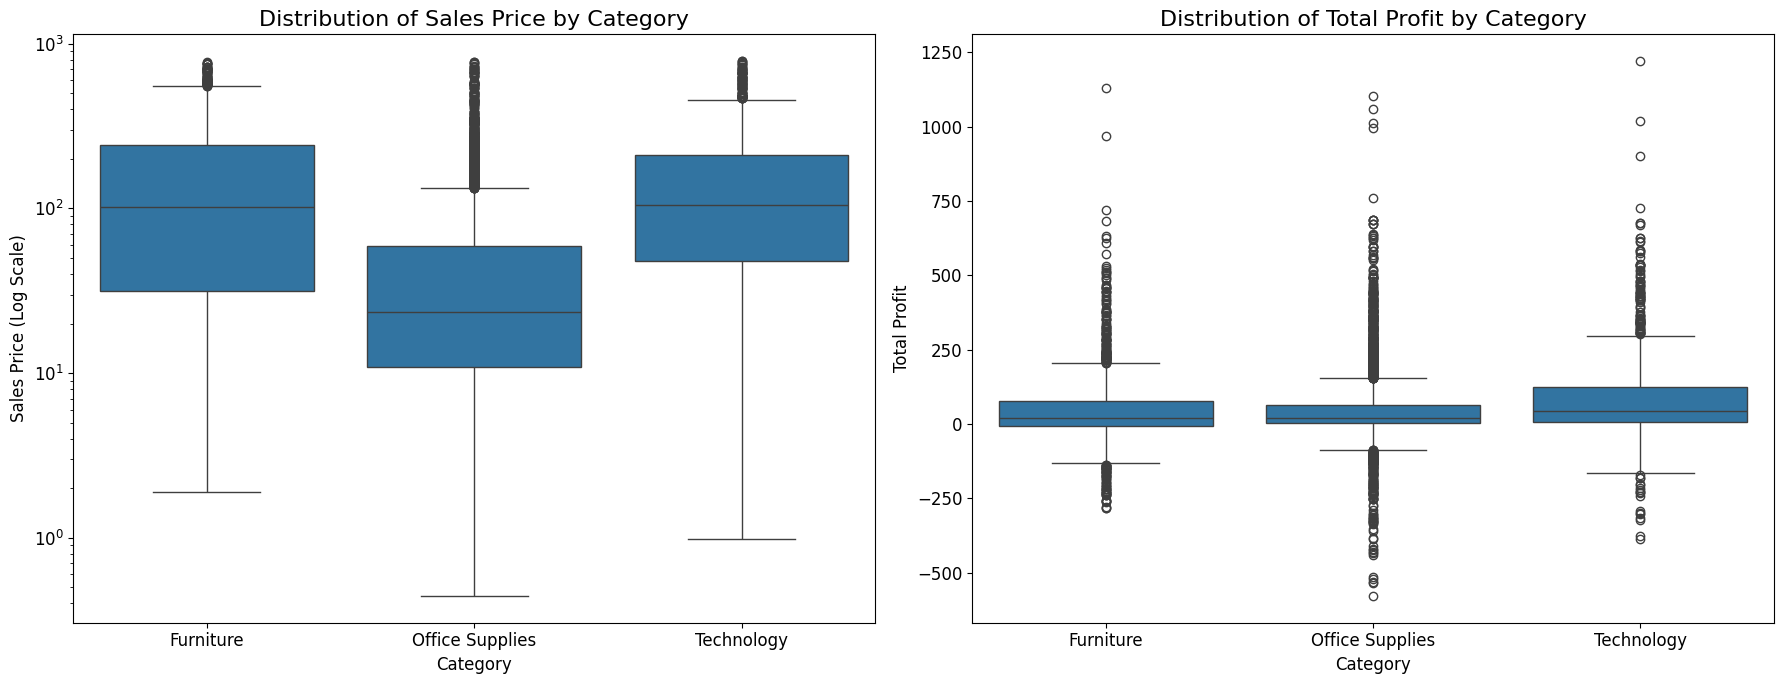

In [ ]:

print("--- Average Financials per Product Category ---")
category_financials = data.groupby('Category').agg(
    Median_Sales_Price=('Sales Price', 'median'),
    Mean_Sales_Price=('Sales Price', 'mean'),
    Median_Total_Profit=('Total Profit', 'median'),
    Mean_Total_Profit=('Total Profit', 'mean')
).round(2)

print(category_financials)

print("\n--- Visualizing Financial Distributions by Category ---")
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.boxplot(x='Category', y='Sales Price', data=data, ax=axes[0])
axes[0].set_title('Distribution of Sales Price by Category', fontsize=16)
axes[0].set_yscale('log')
axes[0].set_ylabel('Sales Price (Log Scale)')

sns.boxplot(x='Category', y='Total Profit', data=data, ax=axes[1])
axes[1].set_title('Distribution of Total Profit by Category', fontsize=16)

plt.tight_layout()
plt.show()

*While our analysis of individual products pointed us to a list of suspects, this category-level view has identified the main culprit. The pivot tables and charts prove that the Furniture category is systemically underperforming.*

*To be clear, it's not losing money in absolute terms, but it is a major **drag on efficiency**. With a profit margin of only **7-8%**, it operates far below the healthy returns of Office Supplies (19-22%) and Technology (13-15%). This structural inefficiency means it consumes huge amounts of sales revenue for a disproportionately small profit.*

*We have now successfully narrowed our investigation from a general 'discount problem' to a specific 'Furniture category problem'. Next, we'll quickly investigate if our operations are playing a role before we synthesize all these findings.*

### Section 2.4: Analysis - Shipping Urgency
The Business Question: We've found a product problem. But could an operational choice, like shipping speed, also be hurting our profits?

A violin plot is like a **smarter, more detailed version of a box plot**. Think of it as a combination of a box plot and a histogram.

*   **Like a Histogram:** The **width** of the violin shows the **density** of your data. Where the violin is **fat**, it means a lot of your orders fall within that profit range. Where it's **thin**, very few orders do.
*   **Like a Box Plot:** It still shows the key summary statistics, usually a white dot for the **median** (the "middle" value) and a thick bar for the interquartile range (the middle 50% of your data).

It's the perfect tool to see not just the average, but the **entire distribution of profit** for each shipping category, side-by-side.


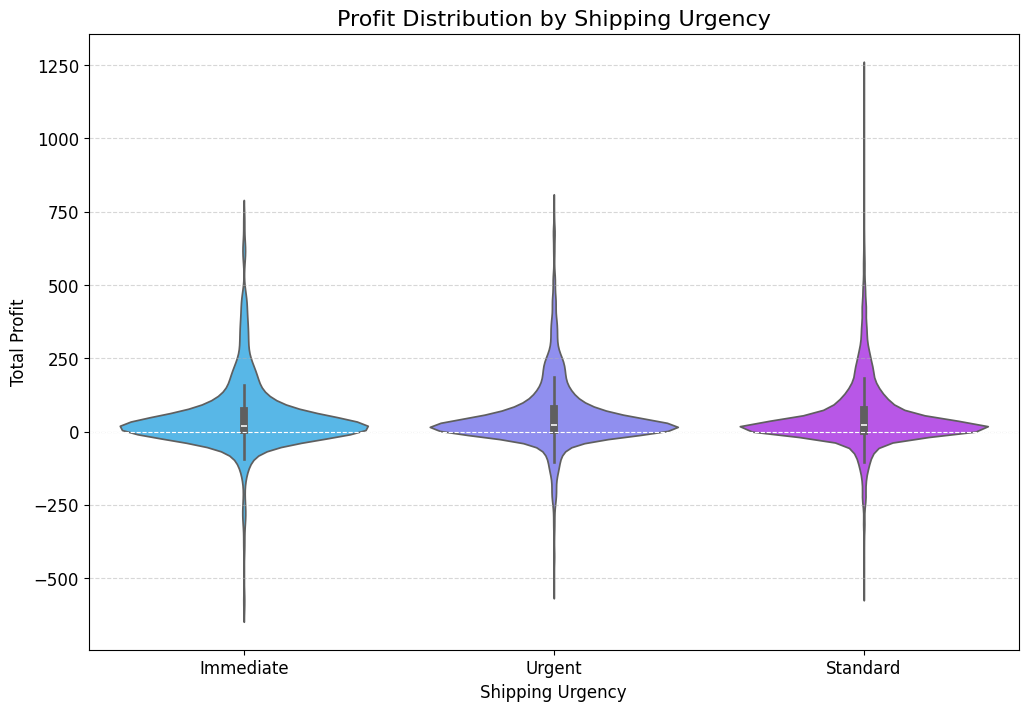

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Shipping Urgency', y='Total Profit', data=data, palette='cool',
               order=['Immediate', 'Urgent', 'Standard'])

plt.title('Profit Distribution by Shipping Urgency', fontsize=16)
plt.xlabel('Shipping Urgency', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.axhline(0, color='white', linewidth=0.8, linestyle='--') # Zero-profit line
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

### checking the distribution of profit , and associated skewness and kurtosis - to determine if the data is normally distributed and perform statistical analysis

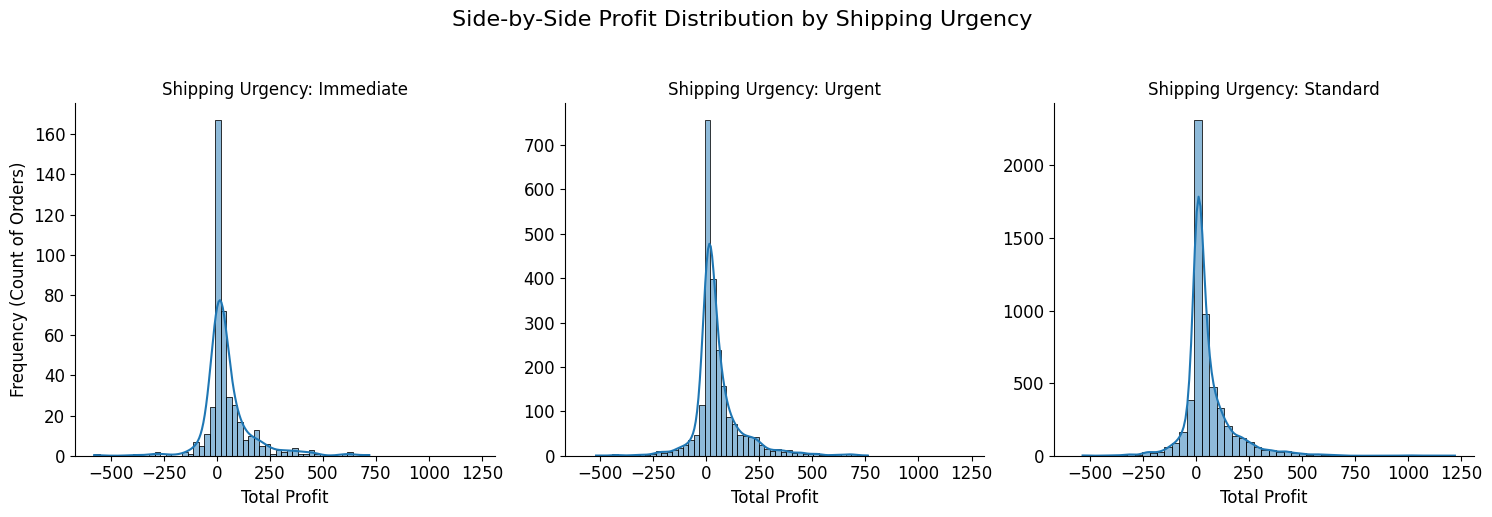

--- Statistical Shape Descriptors ---
Mode: Immediate
  Skewness: 1.464
  Kurtosis: 8.623

Mode: Urgent
  Skewness: 1.635
  Kurtosis: 7.471

Mode: Standard
  Skewness: 2.199
  Kurtosis: 12.933



In [ ]:
# Define the logical order for the columns
order = ['Immediate', 'Urgent', 'Standard']

# 1. Initialize the FacetGrid object.
# This creates a grid of plots based on the 'Shipping Urgency' column.
# `sharey=False` is important here because the number of orders in each category
# is very different. This allows each plot to have its own y-axis scale,
# making the *shape* of each distribution easy to see.
g = sns.FacetGrid(data, col="Shipping Urgency", col_order=order, sharey=False, height=5)

# 2. Map the plotting function to the grid.
# This tells Seaborn: "On each subplot in the grid, draw a histplot of 'Total Profit'
# for that specific category's data."
g.map(sns.histplot, 'Total Profit', kde=True, bins=50)

# 3. Add titles and labels for clarity
g.fig.suptitle('Side-by-Side Profit Distribution by Shipping Urgency', y=1.03, fontsize=16)
g.set_axis_labels("Total Profit", "Frequency (Count of Orders)")
g.set_titles("Shipping Urgency: {col_name}") # Adds a subtitle to each plot

# Show the final, combined plot
plt.tight_layout()
plt.show()

# --- You can still print the statistics separately in a loop ---
print("--- Statistical Shape Descriptors ---")
for mode in order:
    profits = data[data['Shipping Urgency'] == mode]['Total Profit']
    skew = stats.skew(profits)
    kurtosis = stats.kurtosis(profits)
    print(f"Mode: {mode}")
    print(f"  Skewness: {skew:.3f}")
    print(f"  Kurtosis: {kurtosis:.3f}\n")

### The Kruskal-Wallis Test: The "Fair Restaurant Review" Analogy

Imagine you want to decide which of three food delivery apps is best: **Swiggy, Zomato, or a local favorite**.

A simple approach would be to use a standard test like **ANOVA**, which works by comparing the **average (mean)** delivery time for each app. But this can be very misleading.

#### The Problem with Averages (Why ANOVA Fails Here)

Let's say you collect this data:
*   **Swiggy:** Most deliveries take 20-30 minutes.
*   **Zomato:** Most deliveries take 20-30 minutes.
*   **Local App:** Most deliveries also take 20-30 minutes, but one order got stuck in traffic and took **3 hours (180 minutes)!**

If you use ANOVA to compare the averages, that single 3-hour delivery will drastically pull up the "Local App's" average time, making it look terrible, even though it's usually just as fast as the others.

**ANOVA is like a judge who is easily fooled by one dramatic story.** It's a great tool, but only when the data for each group is nicely balanced and doesn't have extreme outliers (i.e., it's "normally distributed"). Our delivery time data, with its potential for huge delays, is not balanced.

#### The Fairer Solution: Ranking the Performance (Why Kruskal-Wallis Works)

We need a judge who can't be fooled by drama. The **Kruskal-Wallis test** is that judge. It works differently:

1.  **It ignores the actual minutes:** It doesn't care if a delivery took 25 minutes or 180 minutes.
2.  **It ranks everyone:** It takes all the delivery times from all the apps, puts them in one big pile, and sorts them from fastest to slowest. The fastest delivery in the city gets Rank #1, the next gets Rank #2, and so on.
3.  **It judges the teams based on their average rank:** The test then calculates the average rank for each app. The 3-hour delivery will get a very bad rank, but it's just *one* bad rank among many good ones. The test is more interested in which app *consistently* performs well and gets good ranks.

**We choose Kruskal-Wallis over ANOVA because our profit data acts just like the delivery time data.** Most orders have small profits, but a few have massive profits or massive losses. These extreme outliers would fool ANOVA into giving us a misleading result. Kruskal-Wallis, by using ranks, gives us a much more reliable and trustworthy verdict.

---

### Tying it all to Your Business Analysis

Now, we frame the rest of the analysis exactly as before:

*   **The Null Hypothesis (H₀):** There is **no real difference** in profitability among the shipping methods. All "teams" (Immediate, Urgent, Standard) are equally good.
*   **The Alternative Hypothesis (H₁):** There **is a real difference**. At least one shipping method is significantly more or less profitable than the others.

**The P-Value is our verdict.** It answers:

> "If all the shipping methods were truly equal (H₀ is true), what is the probability that we would see the difference in average ranks that we observed in our data, just by pure random luck?"

#### **The Result from Our Data:**

*   **P-Value = 0.2051**

#### **Conclusion:**

The p-value of 20.5% is very high (much higher than our 5% threshold for "surprising" results). This means the differences we see in our data are not statistically significant and could easily be a coincidence.

We **fail to reject the null hypothesis**. Our fair and robust test shows no convincing evidence that one shipping method is more profitable than another.

In [ ]:


# 1. Prepare the data: Create a list of profit arrays, one for each shipping group
urgency_groups = data.groupby('Shipping Urgency')['Total Profit'].apply(list)
immediate_profit = urgency_groups.get('Immediate', [])
urgent_profit = urgency_groups.get('Urgent', [])
standard_profit = urgency_groups.get('Standard', [])

# 2. Perform the Kruskal-Wallis H-Test, ensuring we have at least two groups
if len(urgency_groups) >= 2:
    h_statistic, p_value = kruskal(immediate_profit, urgent_profit, standard_profit)

    print("--- Kruskal-Wallis Test Results: Profit vs. Shipping Urgency ---")

    print(f"P-value: {p_value:.4f}")

    # 3. Interpret the result
    alpha = 0.05
    if p_value < alpha:
        print("\nConclusion: Reject the null hypothesis.")
        print("There is a statistically significant difference in profit among the shipping urgency groups.")
    else:
        print("\nConclusion: Fail to reject the null hypothesis.")
        print("There is no statistically significant difference in profit among the shipping urgency groups.")
else:
    print("Not enough shipping urgency groups to perform the test.")

--- Kruskal-Wallis Test Results: Profit vs. Shipping Urgency ---
P-value: 0.2051

Conclusion: Fail to reject the null hypothesis.
There is no statistically significant difference in profit among the shipping urgency groups.


In [ ]:
profit_summary_by_urgency = data.groupby('Shipping Urgency')['Total Profit'].describe()
print(profit_summary_by_urgency)

                   count       mean         std       min     25%      50%  \
Shipping Urgency                                                             
Immediate          431.0  49.696173  119.055281 -578.0291  3.8826  17.7568   
Standard          5717.0  52.052607  116.240839 -534.3570  3.4357  21.5928   
Urgent            2307.0  53.337892  115.181857 -519.8094  4.3954  23.7993   

                       75%        max  
Shipping Urgency                       
Immediate         68.61195   719.2800  
Standard          75.18420  1220.7468  
Urgent            76.61520   760.6386  


#### Regional Profitability

We are analysing the profitability in terms of profit margin across the states. For that we are taking help of the pivot table to generate a summary per state and then calculate the profit margin

In [ ]:

state_pivot = pd.pivot_table(
    data,
    values=['Total Sales', 'Total Profit'],
    index='State',
    aggfunc='sum'
)

state_pivot['Profit Margin'] = (state_pivot['Total Profit'] / state_pivot['Total Sales'])

sorted_state_pivot = state_pivot.sort_values(by='Total Profit', ascending=False)

top_5_states = sorted_state_pivot.head(5)
bottom_5_states = sorted_state_pivot.tail(5)

print("\n--- Top 5 Most Profitable States ---")
print(top_5_states)

print("\n--- Top 5 Least Profitable States ---")
print(bottom_5_states)


--- Top 5 Most Profitable States ---
            Total Profit  Total Sales  Profit Margin
State                                               
California   128404.4759   771387.589       0.166459
New York      68202.0765   309324.493       0.220487
Washington    30819.8409   180207.864       0.171024
Michigan      19104.3983    73444.153       0.260121
Virginia      16957.8746    67749.370       0.250303

--- Top 5 Least Profitable States ---
                      Total Profit  Total Sales  Profit Margin
State                                                         
South Dakota              597.9689      1770.79       0.337685
District of Columbia      380.1904       882.53       0.430796
North Dakota              285.7701       868.71       0.328959
West Virginia             207.9952       424.48       0.490000
Maine                     187.4676       635.04       0.295206


In [ ]:
print(f"Median profit margin: {state_pivot['Profit Margin'].median():.2%}")
print(state_pivot.sort_values(by='Profit Margin', ascending=False).head(10))

Median profit margin: 25.52%
                      Total Profit  Total Sales  Profit Margin
State                                                         
West Virginia             207.9952      424.480       0.490000
District of Columbia      380.1904      882.530       0.430796
Iowa                     2392.0113     6220.840       0.384516
Vermont                   732.9837     2017.410       0.363329
Arkansas                 4299.1589    12350.120       0.348107
South Dakota              597.9689     1770.790       0.337685
North Dakota              285.7701      868.710       0.328959
New Hampshire            2836.0941     9558.560       0.296707
Maine                     187.4676      635.040       0.295206
Delaware                 6587.3646    22410.583       0.293940


In [ ]:

state_abbreviations = {
    'Alabama': 'AL', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
    'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE',
    'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia': 'DC'
}
state_pivot = state_pivot.reset_index()
state_pivot['State_Code'] = state_pivot['State'].map(state_abbreviations)

fig = px.choropleth(state_pivot,
                    locations='State_Code',
                    locationmode="USA-states",
                    color='Profit Margin',
                    scope="usa",
                    color_continuous_scale="RdYlGn",
                    title="State-Level Profitability per profit margin",
                    hover_name='State',
                    hover_data={'Total Profit': ':.2f'}) # Format hover data
fig.show()

### **Module 2 Summary: Key Findings on Profitability**

We have completed our deep dive into the company's profitability, and the investigation has revealed four critical findings:

1.  **Discount is the Primary Driver of Unprofitability.** Our regression analysis provides statistical proof (`p=0.000`) of a strong negative relationship between discounts and profit. For every 10% of discount offered, we lose an average of $20.69 in profit. However, with an R-squared of only 13%, we know it's not the only factor.

2.  **Losses are Dangerously Concentrated.** While our profits are spread across a healthy, diverse range of products, our financial losses are not. Nearly 20% of all losses are generated by just 10 specific products, giving us a clear target for intervention.

3.  **The Furniture Category is a Systemic Problem.** The investigation revealed that the majority of these underperforming products belong to the Furniture category. Analysis of pivot tables and box plots confirms that Furniture is a structurally unprofitable category across all customer segments, acting as a consistent drain on the company's bottom line.

4.  **Shipping Method is Not a Significant Factor.** Our initial visual hypothesis that shipping urgency was profit-neutral was confirmed by a Kruskal-Wallis test (`p=0.2051`). This is a valuable finding, as it proves that the current multi-tiered shipping strategy is not a source of profit erosion and allows us to focus our attention on the real problems we've uncovered.


## **Module 3: The Customer Deep Dive**

### Section 3.1: A Retention-Driven Business
The Business Question: Is this business driven by finding new customers or keeping existing ones?

The core of this analysis is to give every single order a label: "New" or "Existing". To do this, we need to find each customer's "acquisition date"—the date of their very first purchase.

1.  **Find the First Order:** For every customer, we find the earliest `Order Date` in their history.
2.  **Compare Every Purchase:** We then look at every single transaction they've ever made.
3.  **Apply the Label:**
    *   If a transaction's month is the **same** as their first-ever purchase month, that sale is from a **'New'** customer.
    *   If a transaction's month is **later** than their first-ever purchase month, that sale is from an **'Existing'** customer.



In [ ]:

data['Acquisition_Date'] = data.groupby('Customer ID')['Order Date'].transform('min')
data['Acquisition_Month'] = data['Acquisition_Date'].dt.to_period('M')
data['Order_Month'] = data['Order Date'].dt.to_period('M')


data['Customer_Type'] = np.where(data['Order_Month'] == data['Acquisition_Month'], 'New', 'Existing')



In [ ]:
min_date = data['Order Date'].min()
max_date = data['Order Date'].max()
start_year = min_date.year
end_year = max_date.year

In [ ]:

filtered_data_for_plot = data[(data['Order Date'].dt.year >= start_year) & (data['Order Date'].dt.year <= end_year)].copy()

revenue_by_type_filtered = filtered_data_for_plot.groupby(['Order_Month', 'Customer_Type'])['Total Sales'].sum().unstack().fillna(0)

revenue_by_type_filtered.head()

Customer_Type,Existing,New
Order_Month,,
2014-01,0.000,24222.543
2014-02,1244.152,7304.986
2014-03,1572.440,46432.046
2014-04,5100.688,31999.699
2014-05,5092.724,27553.135


### The Visualization: Why a Stacked Bar Chart?

A **stacked bar chart** is the perfect choice here. Each bar represents 100% of the revenue for a given month. The chart then shows us how that total bar is divided between the two segments: blue for 'Existing' customers and red for 'New'. This allows us to see two trends at once:
1.  The overall growth of the business (the total height of the bars).
2.  The changing importance of new vs. loyal customers over time (the ratio of red to blue in each bar).


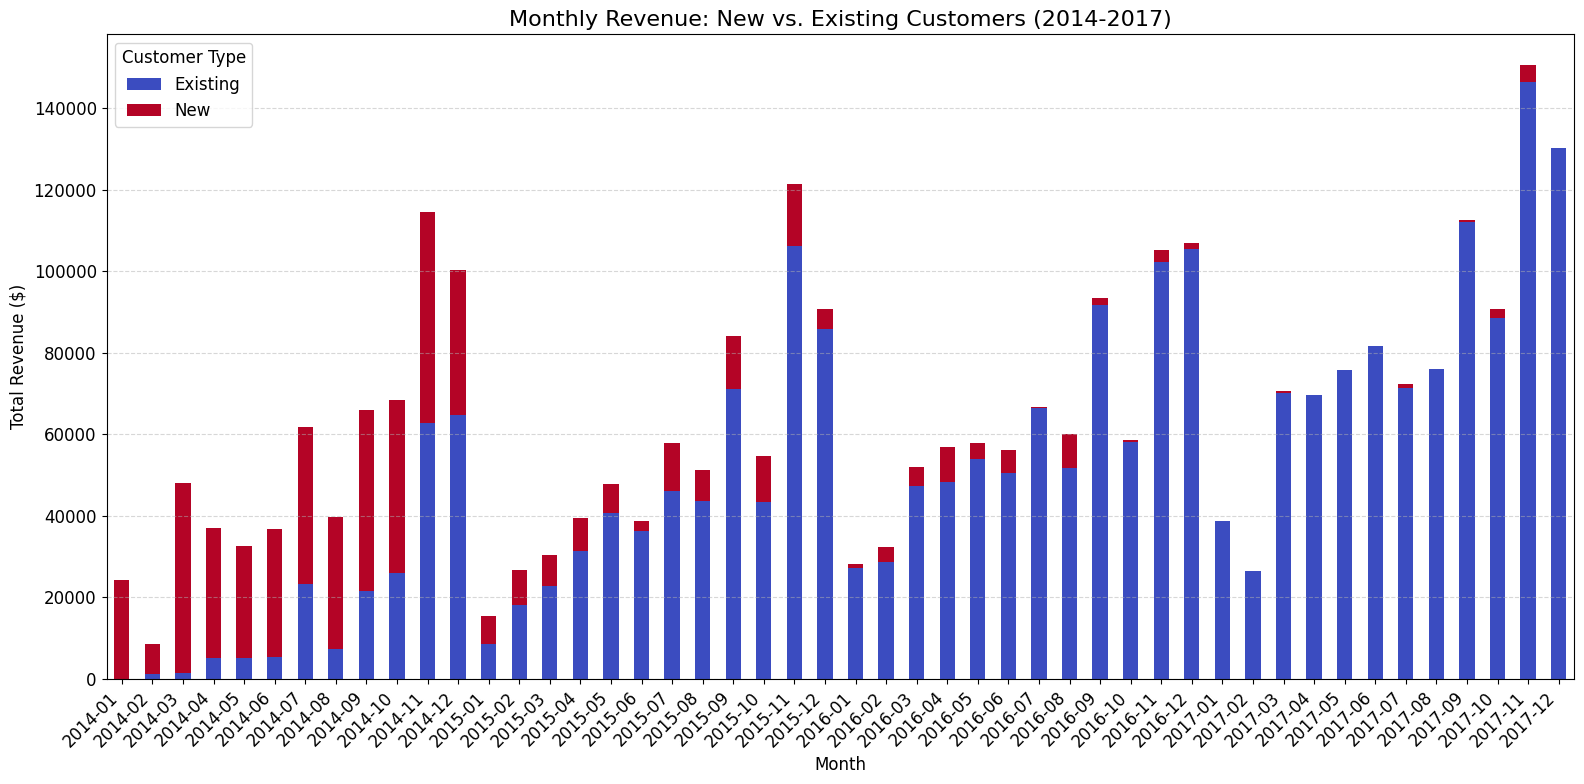

In [ ]:
revenue_by_type_filtered.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='coolwarm')

plt.title(f'Monthly Revenue: New vs. Existing Customers ({start_year}-{end_year})', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Type')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

*This chart is the key to our entire customer strategy. It shows that the business has successfully shifted from relying on new customers to getting the vast majority of its revenue from existing, repeat customers. This proves that customer loyalty and lifetime value are the true engines of this business.*

### Section 3.2: A "Smarter" Segmentation Model
The Business Question: We know loyalty is key. How can we segment our customers to find our most valuable, loyal users?

In [ ]:
data.groupby(['Customer ID'])['Customer_Total_Sales'].first()

,Customer_Total_Sales
Customer ID,
AA-10315,1847.172
AA-10375,1734.870
AA-10480,2262.666
AA-10645,5642.880
AB-10015,1984.480
...,...
XP-21865,6741.700
YC-21895,3068.688
YS-21880,5941.420


In [ ]:
data.groupby(['Customer ID'])['Customer_Total_Profit'].first()

,Customer_Total_Profit
Customer ID,
AA-10315,226.9427
AA-10375,453.0894
AA-10480,530.8480
AA-10645,827.9515
AB-10015,262.7361
...,...
XP-21865,1275.5570
YC-21895,422.9460
YS-21880,580.5368


### The Business Question: Who Are Our *Truly* Best Customers?

A simple list of top-spending customers can be misleading. A customer who spends a lot but costs us money in discounts and returns isn't a "good" customer. Our real goal is to find the customers who are both **high-spending AND highly profitable**. This analysis segments our entire customer base to find these "champions" and, just as importantly, to identify the problematic segments.

### The Strategy: A Two-Dimensional Ranking System

The strategy involves creating a simple but powerful 2D grid. Instead of using raw dollar amounts, we rank every customer twice:

1.  **Sales Ranking:** We sort all customers by their lifetime sales and divide them into five equal groups, or **quintiles**. Group 5 are the top 20% of spenders, and Group 1 are the bottom 20%.
2.  **Profit Ranking:** We do the same for their lifetime profit. Group 5 are the top 20% most profitable, and Group 1 are the least profitable (or most loss-making).

By plotting these two rankings against each other, we can instantly see where each customer falls on the grid and identify key personas like "High Sales, High Profit" (our Champions) or "High Sales, Low Profit" (our problem children).


In [ ]:
data['Customer Sales Quintile'] = pd.qcut(data['Customer_Total_Sales'], q=5, labels=[1, 2, 3, 4, 5])
data['Customer Profit Quintile'] = pd.qcut(data['Customer_Total_Profit'], q=5, labels=[1, 2, 3, 4, 5])

print(data[['Customer ID', 'Customer_Total_Sales', 'Customer Sales Quintile', 'Customer_Total_Profit', 'Customer Profit Quintile']].head())
customer_segmentation_grid = pd.crosstab(
    data['Customer Sales Quintile'],
    data['Customer Profit Quintile']
)

print(customer_segmentation_grid)

  Customer ID  Customer_Total_Sales Customer Sales Quintile  \
0    CG-12520               565.584                       1   
1    DV-13045              1825.644                       1   
2    SO-20335              5555.290                       4   
3    BH-11710              3824.367                       3   
4    BH-11710              3824.367                       3   

   Customer_Total_Profit Customer Profit Quintile  
0                89.3296                        1  
1               -41.4590                        1  
2              1093.5218                        4  
3              1074.6921                        4  
4              1074.6921                        4  
Customer Profit Quintile    1    2    3    4    5
Customer Sales Quintile                          
1                         895  634  164    0    0
2                         300  482  597  298   15
3                         237  302  447  489  222
4                         158  153  317  481  582
5        

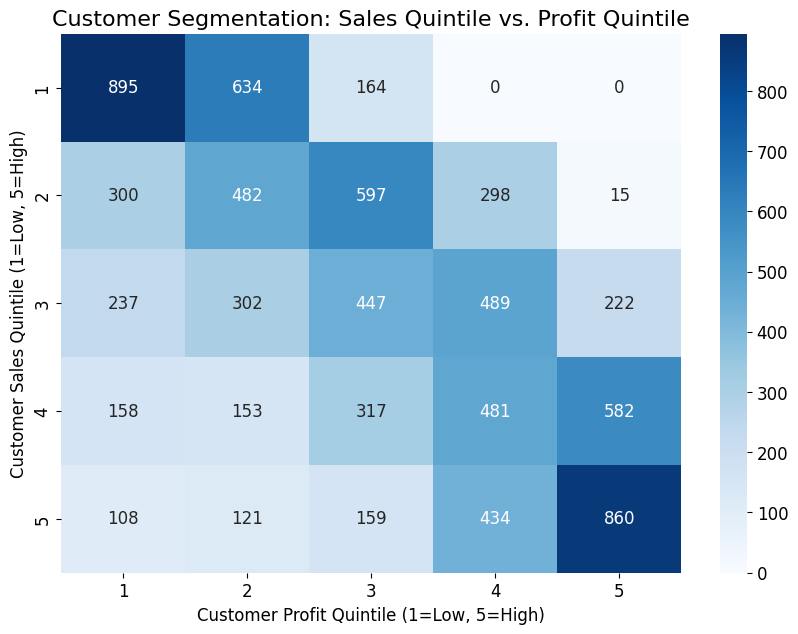

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(customer_segmentation_grid, annot=True, fmt='d', cmap='Blues')


plt.title('Customer Segmentation: Sales Quintile vs. Profit Quintile', fontsize=16)
plt.xlabel('Customer Profit Quintile (1=Low, 5=High)', fontsize=12)
plt.ylabel('Customer Sales Quintile (1=Low, 5=High)', fontsize=12)

plt.show()

Now that we've found our problem segment, we need to diagnose the cause. Our primary suspect is **discounts**. Are these "High Sales, Low Profit" customers simply chasing deals? This code calculates the average discount given to each specific segment on our grid.

Average Discount per Customer Segment:
Customer Profit Quintile         1         2         3         4         5
Customer Sales Quintile                                                   
1                         0.188872  0.120347  0.104390       NaN       NaN
2                         0.210667  0.159378  0.118878  0.128020  0.026667
3                         0.247553  0.189735  0.154922  0.131840  0.098198
4                         0.223101  0.166797  0.158423  0.148753  0.101203
5                         0.215000  0.160744  0.210314  0.157535  0.126337

--- Heatmap of Average Discount per Customer Segment ---


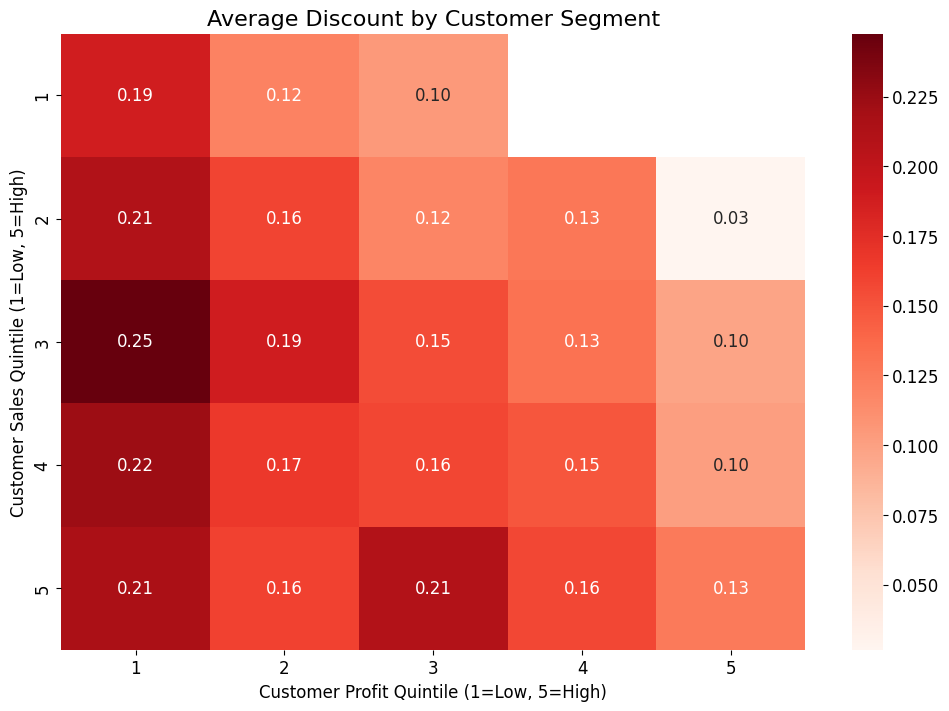

In [ ]:
# --- VISUALIZING THE CHARACTERISTICS OF CUSTOMER SEGMENTS ---

# 1. Calculate the average discount for each segment grid
avg_discount_grid = data.groupby(['Customer Sales Quintile', 'Customer Profit Quintile'])['Discount'].mean().unstack()
print("Average Discount per Customer Segment:")
print(avg_discount_grid)

# 2. Create the heatmap for average discount
print("\n--- Heatmap of Average Discount per Customer Segment ---")
plt.figure(figsize=(12, 8))
sns.heatmap(avg_discount_grid, annot=True, fmt='.2f', cmap='Reds')

# 3. Add titles and labels
plt.title('Average Discount by Customer Segment', fontsize=16)
plt.xlabel('Customer Profit Quintile (1=Low, 5=High)', fontsize=12)
plt.ylabel('Customer Sales Quintile (1=Low, 5=High)', fontsize=12)
plt.show()

*A simple sales vs. profit grid is a good start. It helps us find our 'Champions' (top right) but it also reveals a problem: the 'High Sales, Low Profit' customers (top left), who are likely discount-chasers. The Discount heat map corroborates this fact*

### The RFM Analogy: The "Fit-Life" App's "Diamond User" Challenge

Imagine you're the lead data scientist at "Fit-Life," a popular fitness tracking app. The marketing team wants to launch a new, exclusive feature called **"Diamond Club"** and they need you to identify the top 5% of your most dedicated and valuable users to invite.

#### The First Attempt: The "Total Kilometers" Mistake

Your junior analyst pulls a list of users sorted by the **total kilometers they've run all year**. This is like our first analysis that just looked at `Total Sales`.

At the top of the list is a user named **"Marathon Man"**. His stats are incredible—he has run four full marathons this year, totaling over 168km! But you, the senior scientist, are suspicious. You dig deeper and find that "Marathon Man":
*   Only opens the app four times a year.
*   Ignores all community features.
*   Hasn't logged a run in 95 days.

He is a "binge-and-purge" user. He's not truly engaged with the app's ecosystem. Inviting him to the "Diamond Club" would be a mistake. You need a system that measures **true commitment**, not just brute-force numbers.

#### The "Diamond Score": A Smarter System Based on User Habits (RFM)

You decide to build a "Diamond Score" based on three key behaviors that define a truly committed user. This is your **RFM Model**.

1.  **Recency (R) - "Active Status"**
    *   **The Question:** How recently has the user been active? Are they currently engaged or have they gone dormant?
    *   **The Measurement:** Days since their last logged workout. A user who was active yesterday gets a high score (5/5). A user who was last active 3 months ago gets a low score (1/5).

2.  **Frequency (F) - "The Habit"**
    *   **The Question:** Is using the app a consistent part of their lifestyle?
    *   **The Measurement:** Total number of workout sessions logged. A user with 200 sessions gets a high score (5/5). A user with only 4 sessions gets a low score (1/5).

3.  **Monetary (M) - "The Impact"**
    *   **The Question:** What is the overall magnitude of their effort?
    *   **The Measurement:** Total kilometers run or total time spent working out. This is where "Marathon Man" gets his high score.

#### The Strategic Decision: Weighting What Matters Most

This is where your genius comes in. You declare that for "Fit-Life," **a consistent daily habit is more valuable than a few spectacular achievements.** You set the strategic weights for the "Diamond Score":

*   **Recency ("Active Status"): 40%**
*   **Frequency ("The Habit"): 40%**
*   **Monetary ("The Impact"): 20%**

This is a powerful, strategic choice. You are programming your definition of a "good user" into the algorithm. You're saying: **"I value consistent engagement (R and F) twice as much as raw performance numbers (M)."**

#### The Final Verdict: Finding the True Champions

When you apply the new "Diamond Score":

*   **"Marathon Man"**:
    *   Recency Score: 1/5 (dormant)
    *   Frequency Score: 1/5 (infrequent)
    *   Monetary Score: 5/5 (high impact)
    *   **Final Weighted Score: (1 * 0.4) + (1 * 0.4) + (5 * 0.2) = 0.4 + 0.4 + 1.0 = 1.8** (A very low score)

*   **"Daily Walker" Priya**:
    *   Recency Score: 5/5 (active yesterday)
    *   Frequency Score: 5/5 (200+ workouts)
    *   Monetary Score: 3/5 (moderate impact)
    *   **Final Weighted Score: (5 * 0.4) + (5 * 0.4) + (3 * 0.2) = 2.0 + 2.0 + 0.6 = 4.6** (A top-tier score)

**Conclusion:** The RFM "Diamond Score" successfully filters out the misleading "Marathon Man" and correctly identifies Priya as a truly committed, high-value user. It gives the marketing team a reliable, data-driven list of users who have earned their spot in the "Diamond Club."

This is precisely what our weighted RFM model does for our business: it looks past the flashy, high-spending (but potentially unprofitable) customers and identifies our truly loyal, consistent, and ultimately more valuable customer base.

Our last analysis, the Sales vs. Profit grid, was a great first step. It helped us find a "problem segment": customers who spend a lot but are not profitable.

But this created a new, more difficult problem: **How do we tell the difference between a *good* high-spender and a *bad* one?** One customer might spend ₹50,000 over 10 profitable orders. Another might spend ₹50,000 on one heavily discounted, loss-making order. Our old system isn't smart enough to distinguish them.

We need a system that understands customer **habits and loyalty**, not just total sales. This is why we are graduating to the more advanced **RFM model**.

### What is RFM? Applying the "Fitness App" Logic to Our Store

Just like we identified the "true commitment" of a fitness app user, we will now measure the "true loyalty" of our Superstore customers using the same three concepts:

1.  **Recency (R) - "Active Shoppers"**
    *   **The Question:** Is this customer currently active with our store, or have we not seen them in a long time?
    *   **Our Measurement:** Days since their last purchase. A customer who bought last week is a "hot lead." A customer who hasn't bought in a year is "at risk."

2.  **Frequency (F) - "Loyal Habit"**
    *   **The Question:** Is shopping with us a regular habit for this customer?
    *   **Our Measurement:** The total number of unique orders they have placed. A customer with 20 orders is a loyal regular. A customer with only one order is a "one-time buyer."

3.  **Monetary (M) - "Spending Power"**
    *   **The Question:** What is the overall financial impact of this customer?
    *   **Our Measurement:** Their total lifetime sales value.

### The Strategic Heart: Our Custom-Weighted RFM Model

This is where our analysis gets truly smart. We will not treat R, F, and M equally. Based on everything we've learned, we know that raw spending (Monetary) can be misleading. Therefore, we will deliberately prioritize customer loyalty.

We are setting a **strategic weighting** that defines what we consider a "valuable customer":

*   **Recency ("Active Shoppers"): 40%**
*   **Frequency ("Loyal Habit"): 40%**
*   **Monetary ("Spending Power"): 20%**

This is a conscious and powerful business decision. We are programming our model to believe that a customer's **loyal habits (Recency and Frequency) are twice as important as their raw spending (Monetary).**

This weighting directly solves our problem. The unprofitable "discount chaser" might have a high M-score, but their low F-score (they don't shop often) will pull their final grade down. The truly loyal customer who shops regularly will rise to the top, even if their total spending is slightly lower.


In [ ]:
snapshot_date = data['Order Date'].max() + pd.Timedelta(days=1)
rfm_data = data.groupby('Customer ID').agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days,
    'Order ID': 'nunique',
    'Total Sales': 'sum'
}).rename(columns={'Order Date': 'Recency', 'Order ID': 'Frequency', 'Total Sales': 'MonetaryValue'})


rfm_data.head()

,Recency,Frequency,MonetaryValue
Customer ID,,,
AA-10315,186,5,1847.172
AA-10375,21,9,1734.870
AA-10480,261,4,2262.666
AA-10645,57,6,5642.880
AB-10015,417,3,1984.480


In [ ]:

rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm_data['M_Score'] = pd.qcut(rfm_data['MonetaryValue'], 5, labels=[1, 2, 3, 4, 5])


rfm_data['R_Score'] = rfm_data['R_Score'].astype(int)
rfm_data['F_Score'] = rfm_data['F_Score'].astype(int)
rfm_data['M_Score'] = rfm_data['M_Score'].astype(int)

In [ ]:
weight_r = 0.40
weight_f = 0.40
weight_m = 0.20

rfm_data['Weighted_Score'] = (rfm_data['R_Score'] * weight_r) + \
                             (rfm_data['F_Score'] * weight_f) + \
                             (rfm_data['M_Score'] * weight_m)

In [ ]:
rfm_data.head()

,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score,Weighted_Score
Customer ID,,,,,,,
AA-10315,186,5,1847.172,2,2,2,2.0
AA-10375,21,9,1734.870,5,5,2,4.4
AA-10480,261,4,2262.666,2,1,2,1.6
AA-10645,57,6,5642.880,4,3,4,3.6
AB-10015,417,3,1984.480,1,1,2,1.2


In [ ]:
score_labels = ['Bronze', 'Silver', 'Gold', 'Platinum', "Diamond"]
rfm_data['RFM_Segment'] = pd.qcut(rfm_data['Weighted_Score'], q=5, labels=score_labels)

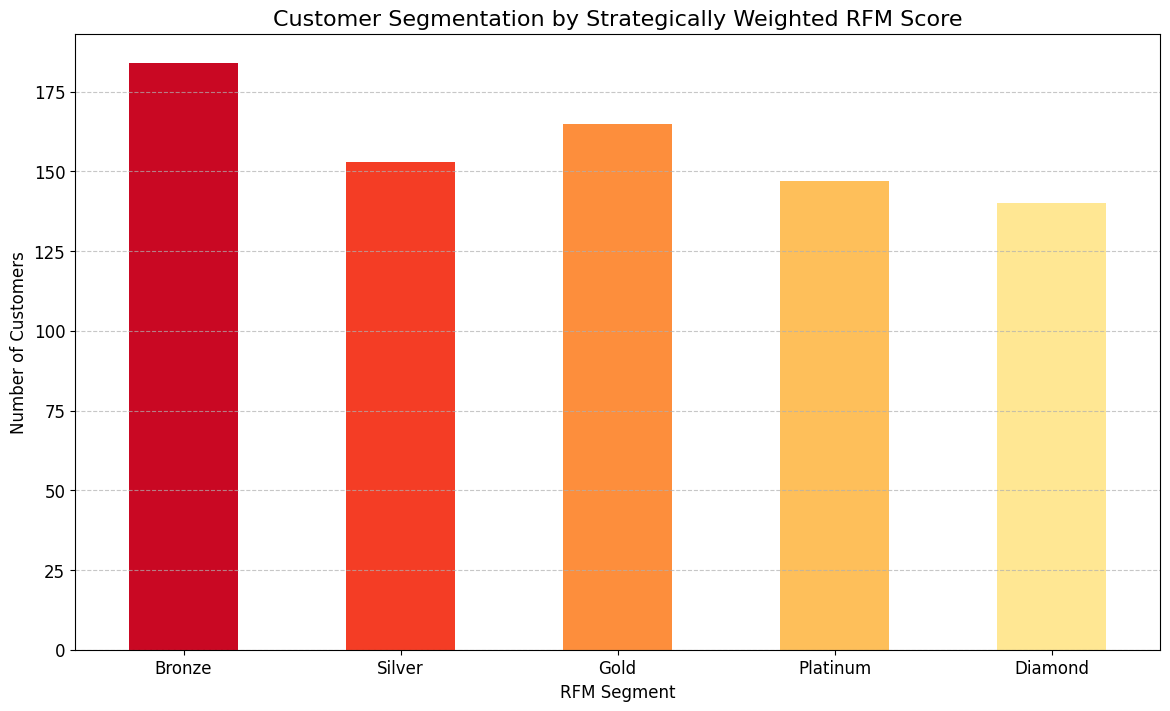


--- Weighted RFM Score Segments ---
RFM_Segment
Bronze      184
Silver      153
Gold        165
Platinum    147
Diamond     140
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(14, 8))
segment_counts = rfm_data['RFM_Segment'].value_counts().reindex(['Bronze', 'Silver', 'Gold', 'Platinum','Diamond'])
segment_counts.plot(kind='bar', color=sns.color_palette('YlOrRd_r', len(segment_counts)))
plt.title('Customer Segmentation by Strategically Weighted RFM Score', fontsize=16)
plt.xlabel('RFM Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



print("\n--- Weighted RFM Score Segments ---")
print(segment_counts)

In [ ]:
data = data.merge(rfm_data[['RFM_Segment']], on='Customer ID', how='left')
print("\nRFM Segment merged back into the main DataFrame:")



RFM Segment merged back into the main DataFrame:


### The Business Question: Do Our Best Customers Come From a Specific Group?

We have just created our advanced RFM segments ('Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond'). This is our new definition of "good" customers.

Now, we need to ask a crucial strategic question: **Are these customer types connected to our old business segments (`Consumer`, `Corporate`, `Home Office`)?**

In simple terms:
*   Do our 'Diamond' customers tend to be 'Consumers'?
*   Are 'Corporate' clients more likely to get stuck in the 'Platinum' tier?
*   Is the 'Home Office' segment a good place to find our best customers, or is it a waste of time?

Answering this will help us focus our marketing budget and strategy.

### The Tool for the Job: The Chi-Squared (χ²) Test of Independence

To answer this, we need a test that can check for a real, statistically significant relationship between two *categorical* variables (`RFM Segment` and `Business Segment`). The perfect tool for this is the **Chi-Squared Test**.

#### The "College Admissions" Analogy for Chi-Squared

Imagine you're an admissions officer at a university. You want to see if there's a connection between the **high school board a student comes from** (CBSE, ICSE, State Board) and the **major they choose** (Engineering, Commerce, Arts).

1.  **The "No Connection" Story (The Null Hypothesis):** Your starting assumption is that there is **no connection**. The choice of major is independent of the student's board. If 30% of all students choose Engineering, you'd expect to see 30% of CBSE students, 30% of ICSE students, and 30% of State Board students choosing Engineering. These are your **Expected Counts**.

2.  **The Real World Data (The Observed Counts):** You then look at your actual admissions data for the year.

3.  **The Chi-Squared Test's Job:** The test is like a powerful calculator. It compares the "No Connection" fantasy world (Expected Counts) with the real world (Observed Counts). It calculates a single number that measures how big the difference is between these two worlds.

4.  **The Verdict (The P-Value):** The test then gives you a p-value, which answers:
    > "If there was truly no connection between board and major, what is the probability that we would see a difference this big just by random chance?"

A low p-value (e.g., less than 0.05) tells you the difference is too big to be a fluke. There *is* a real relationship.

### The Problem: A "Yes/No" Answer Isn't Enough

The Chi-Squared test is great, but it only gives us a "Yes" or "No" answer.
*   "Yes, there is a statistically significant relationship between RFM Segment and Business Segment." (`p < 0.05`)

This is useful, but it doesn't tell us *what* that relationship is. This is where we need a magnifying glass to see the details. That magnifying glass is the **analysis of residuals**.

### The Solution: Using Residuals to Find the *Story*

A "residual" is simply the difference between what we **observed** in reality and what we **expected** to see in the "no connection" world.

#### Back to our College Analogy:

*   Let's say you **expected** 100 CBSE students to choose Engineering.
*   But in reality, you **observed** 150 CBSE students chose Engineering.
*   The difference is **+50**. This is a large, positive residual. It tells you that **CBSE students are over-represented in Engineering.** They have a strong preference for it.

*   Let's say you **expected** 80 ICSE students to choose Engineering.
*   But in reality, you **observed** only 60.
*   The difference is **-20**. This is a negative residual. It tells you that **ICSE students are under-represented in Engineering.** They tend to avoid it.

By turning these residuals into percentages and visualizing them on a heatmap, we can instantly see the entire story of preferences and aversions.


In [ ]:
# --- Chi-Squared Test: RFM Segment vs. Business Segment ---

# 1. Create the contingency table
rfm_business_segment_table = pd.crosstab(data['RFM_Segment'], data['Segment'])
print("--- Contingency Table: RFM Segment vs. Business Segment ---")
print(rfm_business_segment_table)

# 2. Perform the Chi-Squared Test
chi2, p_value, dof, expected = chi2_contingency(rfm_business_segment_table)
print("\n--- Chi-Squared Test Results ---")
print(f"P-value: {p_value:.4f}")

# 3. Interpret the result
if p_value < 0.05:
    print("\nConclusion: There IS a significant association between RFM Segment and Business Segment.")
else:
    print("\nConclusion: There is NO significant association.")

--- Contingency Table: RFM Segment vs. Business Segment ---
Segment      Consumer  Corporate  Home Office
RFM_Segment                                  
Bronze            532        328          222
Silver            652        390          257
Gold              947        530          315
Platinum          906        651          343
Diamond          1401        626          355

--- Chi-Squared Test Results ---
P-value: 0.0000

Conclusion: There IS a significant association between RFM Segment and Business Segment.



--- Expected Counts (If RFM Segments were evenly distributed by business segment) ---
Segment         Consumer   Corporate  Home Office
RFM_Segment                                      
Bronze        567.938025  323.128326   190.933649
Silver        681.840568  387.933176   229.226257
Gold          940.614548  535.162626   316.222827
Platinum      997.303371  567.415730   335.280899
Diamond      1250.303489  711.360142   420.336369

--- Difference from Expectation (%) ---
Segment       Consumer  Corporate  Home Office
RFM_Segment                                   
Bronze       -6.327807   1.507659    16.270758
Silver       -4.376473   0.532778    12.116301
Gold          0.678860  -0.964684    -0.386698
Platinum     -9.155025  14.730693     2.302279
Diamond      12.052795 -11.999568   -15.543830


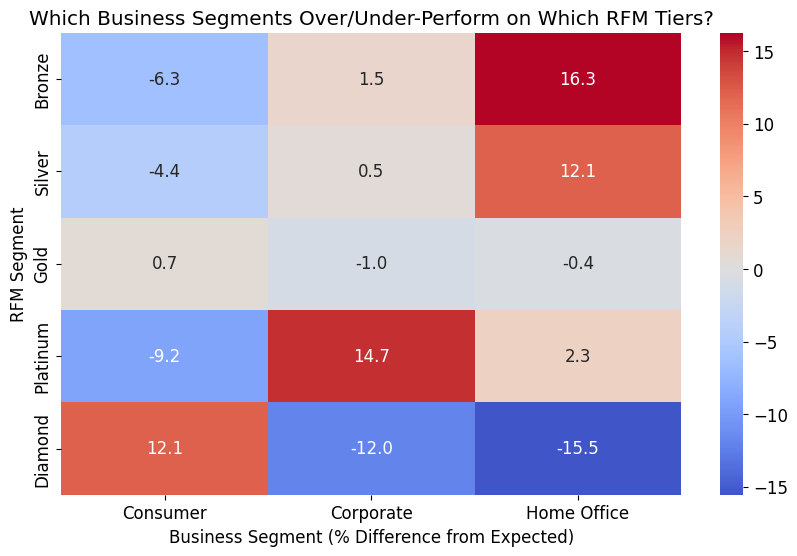

In [ ]:


# The 'expected' values were returned by our chi2_contingency test.
expected_rfm_biz_df = pd.DataFrame(expected, index=rfm_business_segment_table.index, columns=rfm_business_segment_table.columns)

print("\n--- Expected Counts (If RFM Segments were evenly distributed by business segment) ---")
print(expected_rfm_biz_df)

# Calculate the difference as a percentage.
residuals_rfm_biz_percent = (rfm_business_segment_table - expected_rfm_biz_df) / expected_rfm_biz_df * 100

print("\n--- Difference from Expectation (%) ---")
print(residuals_rfm_biz_percent)

# Visualize the residuals as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(residuals_rfm_biz_percent, annot=True, fmt='.1f', cmap='coolwarm', center=0)
plt.title('Which Business Segments Over/Under-Perform on Which RFM Tiers?')
plt.ylabel('RFM Segment')
plt.xlabel('Business Segment (% Difference from Expected)')
plt.show()

#### **Module 3: Customer Deep Dive - Summary of Findings**

Our analysis pivoted from products and operations to the customers themselves, revealing a multi-layered story about who drives the business and what defines their value.

**1. Justification - A Retention-Driven Business:**
An analysis of **New vs. Existing Customers** showed that while the business initially relied on acquisition, it successfully transitioned to a model where the vast majority of revenue now comes from its established, repeat customer base. This confirmed that **customer loyalty and lifetime value are the primary engines of success**, justifying a deep dive into customer behavior.

**2. A Smarter Segmentation - The Weighted RFM Model:**
A simple quintile analysis was useful but revealed a "problem segment" of customers with high sales but low profit. To solve this, we engineered a more sophisticated **Weighted RFM (Recency, Frequency, Monetary) model.** By strategically **down-weighting the 'Monetary' score (Weight: 20%)** and prioritizing behavioral loyalty (**Recency & Frequency Weights: 40% each**), we created a truer ranking of customer value that separates profitable loyalists from unprofitable high-spenders.

**3.  Statistical Validation & Surprising Insights:**
We used  **Chi-Squared test** to validate our new RFM segments and understand their behavior. This led to a cascade of profound, non-obvious insights:


*   **Value IS defined by Segment:** Subsequent tests revealed highly significant associations between our RFM segments and the original business `Segment` (`p=0.0000`).

**4. The Final, Unified Customer Profile:**
By analyzing the residuals of our significant tests, a clear, multi-faceted profile of our customer base emerged:

*   Our **'Diamond' customers** are overwhelmingly **Consumers**.
*   Our **'Platinum' customers** are disproportionately **Corporate** clients. However, this B2B channel is ineffective at creating the top 'Diamond' tier.
*   The **Home Office** segment is a crucial **'Entry-Level Funnel'**, massively over-performing on acquiring low-value 'Bronze' and 'Silver' customers but failing to nurture them further.


## **Module 4: The Strategic Action Plan**


### Section 4.1:  Product Portfolio Strategy
The Business Question: How can we visualize our entire product strategy on a single chart?

### The Big Picture: The "Supermarket Manager's Dilemma"

Imagine you are the manager of a giant supermarket with thousands of different products on the shelves. You can't possibly keep track of every single one. You need a simple, visual system to help you answer critical questions:
*   Which products are my **superstars** that I should place at eye-level?
*   Which products are my reliable **workhorses** that just sell steadily without much fuss?
*   Which products are **new or niche** and might have potential if I promote them?
*   And which products are just **taking up space** and should be discontinued?

This code creates a strategic map—often called a **BCG Matrix**—to solve this exact dilemma for our Superstore business. It plots every single product on a grid to instantly reveal its strategic role.

### The Strategy: Defining the Four Quadrants

To create our map, we will judge every product on two simple but powerful metrics:

1.  **Volume (The X-Axis):** How many units of this product do we sell in total? (`Total_Quantity_Sold`)
2.  **Efficiency (The Y-Axis):** On average, how much profit do we make per unit sold? (`Profit_Per_Unit`)

By plotting these against each other and drawing lines for the overall median, we create four strategic quadrants:

*   **Top-Right (High Volume, High Efficiency):** Our **Stars**. These products sell a lot AND are very profitable. We must protect and invest in them.
*   **Bottom-Right (High Volume, Low Efficiency):** Our **Cash Cows**. These are the reliable workhorses. They sell a lot but aren't super profitable per item. They are the backbone of our business.
*   **Top-Left (Low Volume, High Efficiency):** Our **Question Marks**. These products are highly profitable per sale but don't sell often. They could be our next Stars if we figure out how to market them.
*   **Bottom-Left (Low Volume, Low Efficiency):** Our **Dogs**. These products don't sell well and aren't profitable. They are draining our resources.


In [ ]:
product_summary = data.groupby('Product Name').agg(
    Total_Quantity_Sold=('Quantity', 'sum'),
    Profit_Per_Unit=('Total Profit', 'mean'),
    Category=('Category', 'first') # Add this line
).dropna()

product_summary.head()

,Total_Quantity_Sold,Profit_Per_Unit,Category
Product Name,,,
"""While you Were Out"" Message Book, One Form per Page",8,9.151333,Office Supplies
"#10 Gummed Flap White Envelopes, 100/Box",11,12.988850,Office Supplies
#10 Self-Seal White Envelopes,10,56.503550,Office Supplies
"#10 White Business Envelopes,4 1/8 x 9 1/2",32,187.010257,Office Supplies
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37,51.924340,Office Supplies


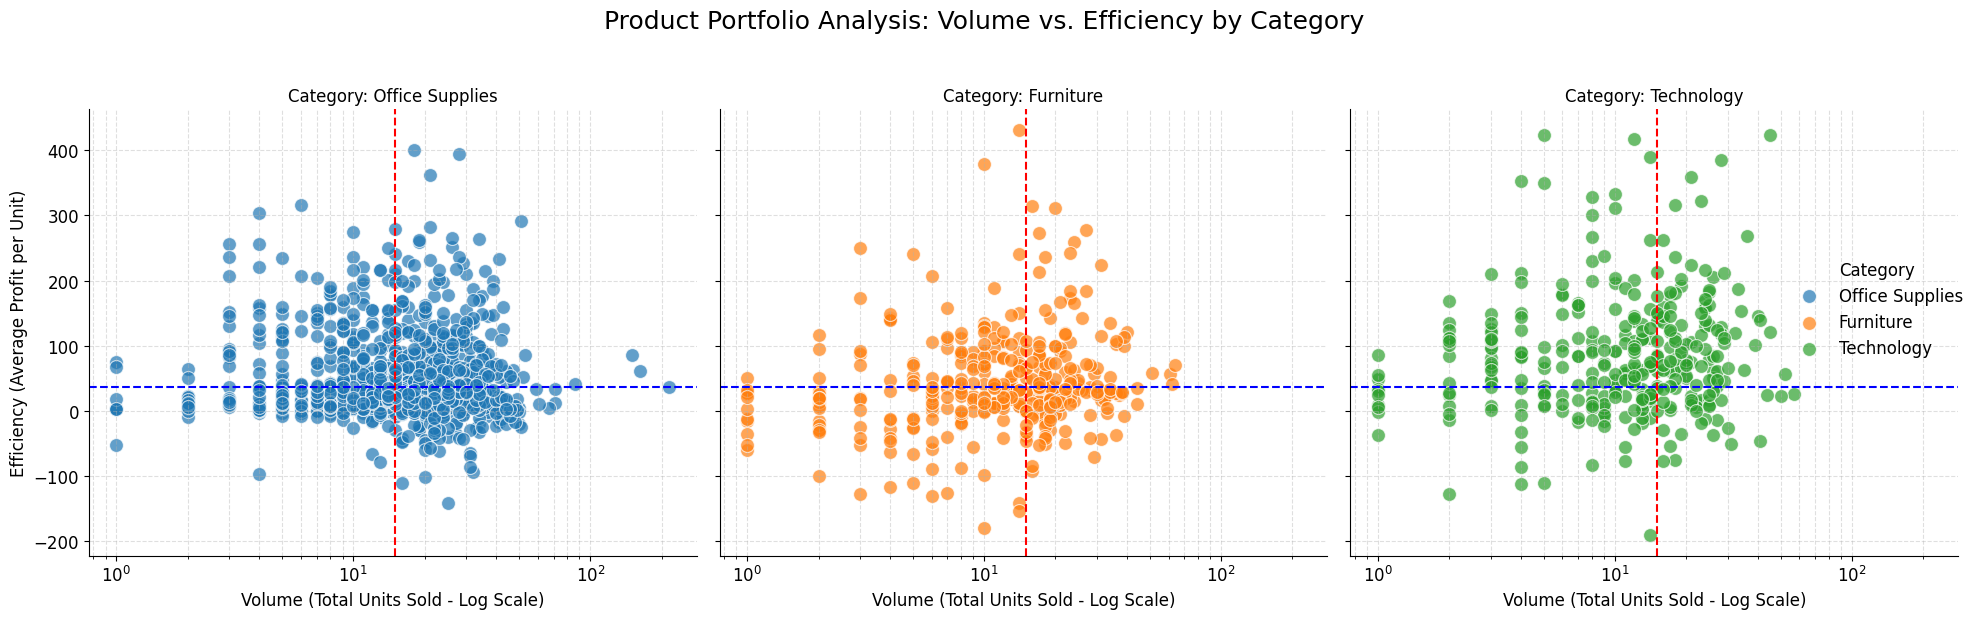

In [ ]:
g = sns.FacetGrid(product_summary, col="Category", hue="Category", col_wrap=3, height=6)

g.map(sns.scatterplot, "Total_Quantity_Sold", "Profit_Per_Unit", alpha=0.7, s=100)


for ax in g.axes.flat:

    volume_median = product_summary['Total_Quantity_Sold'].median()
    efficiency_median = product_summary['Profit_Per_Unit'].median()

    ax.axvline(x=volume_median, color='red', linestyle='--', label='Overall Median Volume')
    ax.axhline(y=efficiency_median, color='blue', linestyle='--', label='Overall Median Profit/Unit')
    ax.set_xscale('log') # Keep the log scale for volume
    ax.grid(True, which="both", ls="--", alpha=0.4)


g.fig.suptitle('Product Portfolio Analysis: Volume vs. Efficiency by Category', y=1.03, fontsize=18)
g.set_axis_labels("Volume (Total Units Sold - Log Scale)", "Efficiency (Average Profit per Unit)")
g.set_titles("Category: {col_name}") # Set title for each subplot
g.add_legend()

plt.tight_layout()
plt.show()

Here is the result. We've faceted this by category to make it even clearer. The blue dashed line represents the overall median profit efficiency, and the red dashed line is the overall median sales volume. These lines divide our product portfolio into four strategic quadrants:

By looking at the plots for each category, the entire story of our business becomes crystal clear:

*   Look at **Office Supplies**. It's a dense, healthy cloud centered around the 'Cash Cow' quadrant. It's the high-volume backbone of the company.
*   Now, look at **Technology**. The entire distribution is shifted upwards. It's packed with high-efficiency 'Question Marks'. The problem isn't profitability; it's sales volume.
*   And finally, look at **Furniture**. The whole distribution is shifted downwards. The vast majority of its products are below the median profit line, with a huge concentration in the 'Dogs' quadrant. This confirms our earlier finding: the Furniture category is systemically underperforming.

# ADDENDUM (Optional STUDY)

### Market Basket Analysis

The Business Question: Are there any non-obvious products that customers tend to buy together? Can we use this to increase the value of our orders?

**The Tool:** To answer this, we'll perform a simple **Market Basket Analysis.** We're looking for pairs of `Sub-Category` items that appear together in the same order. The key metric we're interested in is **'lift'.**

*   `Support` tells us how popular a pair is overall (it's low for rare items).
*   `Confidence` tells us that if a customer buys Item A, how often they buy Item B.
*   But **`Lift`** is the most strategic metric. It tells us how much *more* likely two items are to be purchased together than we would expect by random chance. A lift greater than 1 indicates a real purchasing signal.


In [ ]:
from itertools import combinations

#we group by 'Order ID' and create a unique list of sub-categories for each one.
transactions_df = data.groupby('Order ID')['Sub-Category'].unique().reset_index()
print(transactions_df)


            Order ID                              Sub-Category
0     CA-2014-100090                                 [Binders]
1     CA-2014-100293                                   [Paper]
2     CA-2014-100328                                 [Binders]
3     CA-2014-100363                        [Fasteners, Paper]
4     CA-2014-100391                                   [Paper]
...              ...                                       ...
4614  US-2017-168802                                 [Binders]
4615  US-2017-169320                        [Art, Accessories]
4616  US-2017-169488                                   [Paper]
4617  US-2017-169502                    [Supplies, Appliances]
4618  US-2017-169551  [Bookcases, Paper, Storage, Accessories]

[4619 rows x 2 columns]


In [ ]:
transactions_df['pairs'] = transactions_df['Sub-Category'].apply(lambda x: list(combinations(sorted(x), 2)))

transactions_df.head()

,Order ID,Sub-Category,pairs
0,CA-2014-100090,[Binders],[]
1,CA-2014-100293,[Paper],[]
2,CA-2014-100328,[Binders],[]
3,CA-2014-100363,"[Fasteners, Paper]","[(Fasteners, Paper)]"
4,CA-2014-100391,[Paper],[]


In [ ]:
transactions_df.explode('pairs').dropna()['pairs'].value_counts().reset_index()

,pairs,count
0,"(Binders, Paper)",244
1,"(Binders, Furnishings)",168
2,"(Furnishings, Paper)",159
3,"(Binders, Storage)",155
4,"(Art, Paper)",143
...,...,...
120,"(Copiers, Storage)",1
121,"(Appliances, Copiers)",1
122,"(Art, Copiers)",1
123,"(Chairs, Copiers)",1


In [ ]:
pair_counts = transactions_df.explode('pairs').dropna()['pairs'].value_counts().reset_index()
pair_counts.columns = ['pair', 'count']

pair_counts.head()

,pair,count
0,"(Binders, Paper)",244
1,"(Binders, Furnishings)",168
2,"(Furnishings, Paper)",159
3,"(Binders, Storage)",155
4,"(Art, Paper)",143


In [ ]:
print(f"\nFound {len(pair_counts)} unique product pairs across all orders.")
print("Top 10 most frequently co-purchased pairs:")
print(pair_counts.head(10))


Found 125 unique product pairs across all orders.
Top 10 most frequently co-purchased pairs:
                     pair  count
0        (Binders, Paper)    244
1  (Binders, Furnishings)    168
2    (Furnishings, Paper)    159
3      (Binders, Storage)    155
4            (Art, Paper)    143
5        (Paper, Storage)    141
6          (Art, Binders)    134
7       (Binders, Phones)    132
8         (Paper, Phones)    127
9  (Accessories, Binders)    126


In [ ]:
#for each individual product, we need total no. of transactions and purchase count
total_transactions = len(data['Order ID'].unique())
individual_product_counts = data.groupby('Sub-Category')['Order ID'].nunique()

print(individual_product_counts)

Sub-Category
Accessories     612
Appliances      339
Art             729
Binders        1188
Bookcases       144
Chairs          404
Copiers           8
Envelopes       233
Fasteners       215
Furnishings     822
Labels          337
Machines         32
Paper          1138
Phones          628
Storage         664
Supplies        174
Tables          120
Name: Order ID, dtype: int64


In [ ]:
def calculate_metrics(pair, count):
    item1, item2 = pair

    # Support = How popular is this pair in all transactions = no. of transactions with this pair / total no. of transactions
    support = count / total_transactions

    # Confidence: If a customer buys Item 1, how likely are they to also buy Item 2 = support(I1 and I2) / Support(I1)
    count_item1 = individual_product_counts.get(item1, 0)
    confidence = count / count_item1 if count_item1 > 0 else 0

    # Lift: How much more likely is the co-purchase than would be expected by random chance? = support(I1 and I2) / Support(I1) * Support(I2)
    count_item2 = individual_product_counts.get(item2, 0)
    lift = (support * total_transactions) / (count_item1 * count_item2) * total_transactions if (count_item1 > 0 and count_item2 > 0) else 0

    return support, confidence, lift

In [ ]:
metrics = pair_counts['pair'].apply(lambda x: calculate_metrics(x, pair_counts[pair_counts['pair'] == x]['count'].iloc[0]))
pair_counts[['support', 'confidence', 'lift']] = pd.DataFrame(metrics.tolist(), index=pair_counts.index)

pair_counts.head()


,pair,count,support,confidence,lift
0,"(Binders, Paper)",244,0.052825,0.205387,0.833641
1,"(Binders, Furnishings)",168,0.036372,0.141414,0.794637
2,"(Furnishings, Paper)",159,0.034423,0.193431,0.785111
3,"(Binders, Storage)",155,0.033557,0.130471,0.907601
4,"(Art, Paper)",143,0.030959,0.196159,0.796185


In [ ]:
meaningful_rules = pair_counts[pair_counts['lift'] >= 1.5].sort_values('lift', ascending=False)

print("Top Data-Driven Bundling Opportunities")
if meaningful_rules.empty:
    print("No pairs met the lift >= 1.5 threshold.")
else:
    print(meaningful_rules.head(10))

Top Data-Driven Bundling Opportunities
                      pair  count   support  confidence      lift
124    (Copiers, Supplies)      1  0.000216    0.125000  3.318247
109     (Binders, Copiers)      4  0.000866    0.003367  1.944024
113      (Copiers, Phones)      2  0.000433    0.250000  1.838774
118      (Copiers, Labels)      1  0.000216    0.125000  1.713279
121  (Appliances, Copiers)      1  0.000216    0.002950  1.703171


The first thing to notice is that every single one of our top 5 bundling opportunities involves **Copiers**.
T
he `count` for these pairs is very low—in some cases, just a single order. In many analyses, we might dismiss this. But here, it's the key to the insight. Copiers are a rare, high-ticket, super-important purchase. This analysis isn't about what happens every day; it's about how we can **maximize these critical but infrequent transactions.**

Let's look at the top rule: **(Copiers, Supplies)**. It has a **lift of 3.3**. This means that when a customer is in the specific mindset to buy a high-value item like a Copier, they are **3.3 times more likely** to also purchase associated Supplies than we would normally expect. This isn't a random accident; it's a strong purchasing signal.

**The Actionable Recommendation:**
"This gives us a simple, tactical, and immediate action that requires no new marketing budget:
**Program the website's shopping cart to automatically display a 'Recommended Add-on' prompt for 'Supplies' and 'Phones' whenever a customer adds a 'Copier' to their basket.**

This is a low-cost, data-driven action that uses a proven purchasing behavior to increase the value of our most important sales.

### More Chi-Square tests done on Customer Segments

In [ ]:
# 1. Create a contingency table (crosstab) of the two categorical variables
contingency_table = pd.crosstab(data['RFM_Segment'], data['Category'])

print("--- Contingency Table: RFM Segment vs. Product Category ---")
print(contingency_table)

# 2. Perform the Chi-Squared Test of Independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\n--- Chi-Squared Test Results ---")
print(f"Chi2 statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

# 3. Interpret the result
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis.")
    print("There is a statistically significant association between RFM Segment and Product Category.")
else:
    print("\nConclusion: Fail to reject the null hypothesis.")
    print("There is no statistically significant association between RFM Segment and Product Category.")

--- Contingency Table: RFM Segment vs. Product Category ---
Category     Furniture  Office Supplies  Technology
RFM_Segment                                        
Bronze             194              733         155
Silver             224              856         219
Gold               356             1157         279
Platinum           352             1220         328
Diamond            452             1543         387

--- Chi-Squared Test Results ---
Chi2 statistic: 9.3464
P-value: 0.3139
Degrees of Freedom: 8

Conclusion: Fail to reject the null hypothesis.
There is no statistically significant association between RFM Segment and Product Category.


In [ ]:

# 1. Create the contingency table (crosstab) to observe the counts
rfm_region_table = pd.crosstab(data['RFM_Segment'], data['Region'])

print("--- Contingency Table: RFM Segment vs. Region ---")
print(rfm_region_table)

# 2. Perform the Chi-Squared Test of Independence
chi2, p_value, dof, expected = chi2_contingency(rfm_region_table)

print("\n--- Chi-Squared Test Results ---")
print(f"Chi2 statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

# 3. Interpret the result
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis.")
    print("There IS a statistically significant association between RFM Segment and Region.")
else:
    print("\nConclusion: Fail to reject the null hypothesis.")
    print("There is NO statistically significant association between RFM Segment and Region.")

--- Contingency Table: RFM Segment vs. Region ---
Region       Central  East  South  West
RFM_Segment                            
Bronze           239   323    196   324
Silver           277   396    184   442
Gold             401   482    270   639
Platinum         458   526    324   592
Diamond          549   637    402   794

--- Chi-Squared Test Results ---
Chi2 statistic: 27.4819
P-value: 0.0066
Degrees of Freedom: 12

Conclusion: Reject the null hypothesis.
There IS a statistically significant association between RFM Segment and Region.



--- Expected Counts (If RFM Segments were evenly distributed by region size) ---
Region          Central        East       South        West
RFM_Segment                                                
Bronze       246.217386  302.524897  176.088941  357.168776
Silver       295.597398  363.197635  211.404376  428.800591
Gold         407.783323  501.039385  291.637138  591.540154
Platinum     432.359551  531.235955  309.213483  627.191011
Diamond      542.042342  666.002129  387.656062  786.299468

--- Difference from Expectation (%) ---
Positive numbers mean we have MORE customers in that segment than expected. Negative means FEWER.
Region        Central      East      South      West
RFM_Segment                                         
Bronze      -2.931306  6.768072  11.307387 -9.286583
Silver      -6.291462  9.031547 -12.963013  3.078216
Gold        -1.663463 -3.799978  -7.419198  8.023098
Platinum     5.930353 -0.985618   4.781977 -5.610892
Diamond      1.283600 -4.354660   3.70017

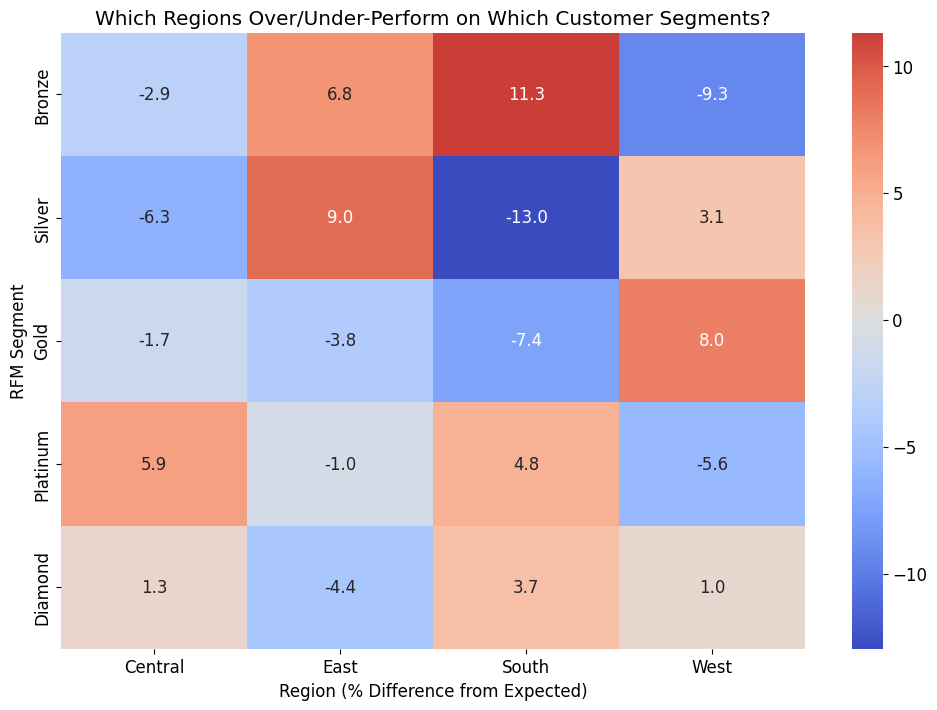

In [ ]:
# Understanding the RFM/Region Relationship with Residuals ---

# The 'expected' values were returned by our chi2_contingency test.
expected_rfm_region_df = pd.DataFrame(expected, index=rfm_region_table.index, columns=rfm_region_table.columns)

print("\n--- Expected Counts (If RFM Segments were evenly distributed by region size) ---")
print(expected_rfm_region_df)

# Calculate the difference as a percentage of the expected value.
residuals_rfm_region_percent = (rfm_region_table - expected_rfm_region_df) / expected_rfm_region_df * 100

print("\n--- Difference from Expectation (%) ---")
print("Positive numbers mean we have MORE customers in that segment than expected. Negative means FEWER.")
print(residuals_rfm_region_percent)

# Visualize the residuals as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(residuals_rfm_region_percent, annot=True, fmt='.1f', cmap='coolwarm', center=0)
plt.title('Which Regions Over/Under-Perform on Which Customer Segments?')
plt.ylabel('RFM Segment')
plt.xlabel('Region (% Difference from Expected)')
plt.show()

### ✅ **Justification for Using Kruskal–Wallis H-Test Instead of ANOVA**

To determine if there is a statistically significant difference in `Total Profit` across our `Shipping Urgency` groups, the standard tool would be an ANOVA. However, ANOVA relies on several key assumptions about the data, most importantly that the data in each group is **normally distributed (shaped like a bell curve).**

We must first validate this assumption. We can do this by examining the **skewness** and **kurtosis** of the profit distribution for each shipping group.

#### **Distribution Shape Analysis (Based on Skewness and Kurtosis)**

*   **Normal (Bell-Curve) Reference Values:**
    *   Skewness ≈ **0** (The distribution is symmetrical)
    *   Excess Kurtosis ≈ **0** (The tails of the distribution are not too heavy or too light)

*   **Our Observed Values:**

| Shipping Urgency | Skewness | Excess Kurtosis | Assessment |
| :--- | :--- | :--- | :--- |
| **Immediate** | 1.464 | 8.623 | Highly Asymmetrical, Very Heavy Tails |
| **Standard** | 2.199 | 12.933 | Extremely Asymmetrical, Extremely Heavy Tails |
| **Urgent** | 1.635 | 7.471 | Highly Asymmetrical, Very Heavy Tails |

**Analysis of the Results:**

1.  **Skewness indicates strong right-tailed asymmetry:**
    *   All groups show high positive skewness values (from **1.46 to 2.20**), which are far from the normal reference of 0. This confirms that our profit distributions are not symmetrical and have a long tail of high-profit outliers.

2.  **Excess Kurtosis values indicate heavy-tailed distributions (Leptokurtic):**
    *   All groups show very high positive kurtosis values (from **7.47 to 12.93**). This indicates that the tails of our distributions are much "heavier" than a normal distribution, meaning that extreme values (both very high profits and very high losses) are more common than a normal model would predict.

### **Conclusion**

The combined high **skewness** and **kurtosis** provide clear statistical evidence that our profit data is **not normally distributed.** Using a standard ANOVA would be statistically inappropriate and could lead to unreliable conclusions.

Therefore, the **Kruskal–Wallis H-test** is the correct and more robust choice for this analysis because:
*   It is a **non-parametric** test, meaning it does **not require the assumption of normality.**
*   It is **robust** to skewed and heavy-tailed distributions because it operates on the **ranks** of the data, not the actual values, which minimizes the influence of extreme outliers.

### 📌 What Is the Kruskal–Wallis H-Test?

In this section, we want to test whether the **distribution of profits differs significantly** across the three shipping modes: *Immediate*, *Urgent*, and *Standard*.

However, since the profit data is **highly skewed and heavy-tailed**, traditional methods like **ANOVA**, which assume normality, are not appropriate.

Instead, we use the **Kruskal–Wallis H-test**, a **non-parametric(does not assume normality, does not require equal variances and is based on ranks of data instead of raw values - thus outliers have less influence) alternative to ANOVA**.

- It works by ranking all the data, then comparing the **average ranks** between groups.
- It tests the **null hypothesis** that the **median profit values are equal** across all groups.
- In other words, it checks whether the observed differences in the data could have occurred by random chance under the assumption that the distributions are the same in location (center).
- It does **not assume normality or equal variances**, making it robust for real-world, skewed data like ours.


If the test returns a **significant result**, it suggests that **at least one group differs** — and we can follow up with a post-hoc test to see which one(s).

